# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings(action='ignore')
# --------------------------------------------------

# --------------------------------------------------
# load datasets
from sklearn import datasets

# imblearn.sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# preprocessing.encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder # pd.get_dummies
# preprocessing.scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# preprocessing.binarizing
from sklearn.preprocessing import Binarizer

# decomposition.PCA
from sklearn.decomposition import PCA
# stats : R module
from scipy.stats import skew, kurtosis

# estimators ---------------------------------------
# estimators.classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression # classifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV # regressor 응용
# estimators.regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
# --------------------------------------------------

# ensemble -----------------------------------------
# ensemble.bagging
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# ensemble.boosting
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
# ensemble.boosting & bagging
from xgboost import XGBRFClassifier, XGBRFRegressor
# ensemble.voting
from sklearn.ensemble import VotingClassifier, VotingRegressor
# --------------------------------------------------

# metrics ------------------------------------------
# metrics.scores
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import log_loss
# metrics.reports
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# metrics.errors
from sklearn.metrics import mean_squared_error     # 'neg_mean_squared_error', 'neg_root_mean_squared_error'
from sklearn.metrics import mean_squared_log_error # 'neg_mean_squared_log_error'
from sklearn.metrics import mean_absolute_error    # 'neg_mean_absolute_error'
# metrics.curves
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, plot_roc_curve
# --------------------------------------------------

# model_selection ----------------------------------
# model_selection.splitter
from sklearn.model_selection import train_test_split       # function
# model_selection.model_validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
# model_selection.hyper_parameter_optimizer
from sklearn.model_selection import GridSearchCV
# --------------------------------------------------


# --------------------------------------------------
def check_nan(df):
    nan = df.isna().sum()[df.isna().sum() != 0]
    nan_cols = list(nan.index)
    nan_cnt  = df[nan_cols].isna().sum()
    rate = round(nan_cnt / df.shape[0] * 100, 2)
    nan_df = pd.DataFrame({'NAN_CNT':nan_cnt, 'RATE':rate})
    
    print(nan_df)
    print('-' * 30)
    print('nan_cols count =', len(nan_cols))
    print(nan_cols)
 
    for col in nan_cols:
        print('-' * 30)
        print(df[col].value_counts())
        print('value_counts =', df[col].count(), '/ nan_counts =', df[col].isna().sum())
    
    return nan_cols
# nan_cols = check_nan(df)
# --------------------------------------------------

# --------------------------------------------------
def check_outliers(X_train, features, rate=1.5):
    
    dict = {}
    
    for col in features:
        
        Q1 = np.percentile(X_train[col], 25) 
        Q3 = np.percentile(X_train[col], 75) 
        IQR = Q3 - Q1
        
        min = Q1 - (rate * IQR)
        max = Q3 + (rate * IQR)
        
        idxs = X_train[(X_train[col] < min) | (X_train[col] > max)].index
        
        dict[col] = idxs
        
    return dict
# check_outliers(X_train, 'Insulin')
# --------------------------------------------------

# --------------------------------------------------
def check_object(df):
    object_cols = list(df.dtypes[df.dtypes == 'object'].index)
    print('object_cols count =', len(object_cols))
    for col in object_cols:
        print('-' * 30)
        print(df[col].value_counts())
    return object_cols
# object_cols = encode(df)
# --------------------------------------------------

# --------------------------------------------------
def mapping(df, col, dict):
    dict = {}
    
    for i in range(len(df[col].value_counts().index)):
        dict[df[col].value_counts().index[i]] = i
    
    df['e_' + col] = df[col].map(dict)
    return df['e_' + col].value_counts()
# mapping(df, 'gender')
# --------------------------------------------------

# --------------------------------------------------
def scores(y_test, y_pred):
    
    """evaluation scores"""
    
    f1        = f1_score         (y_test, y_pred, average='macro')
    accuracy  = accuracy_score   (y_test, y_pred, )
    precision = precision_score  (y_test, y_pred, average='macro')
    recall    = recall_score     (y_test, y_pred, average='macro')
    c_matrix  = confusion_matrix (y_test, y_pred, )
    
    print(
          f'accuracy  = {accuracy:.6f},  '
          f'f1 score  = {f1:.6f},  \n'
          f'precision = {precision:.6f},  '
          f'recall    = {recall:.6f},')
    print(c_matrix)
    
    # plt.figure(figsize=(12, 9))
    # plt.title('confusion matrix')
    # plt.xlabel('Predict')
    # plt.ylabel('Actual')
    # sns.heatmap(c_matrix, annot=True, linewidths=1, cmap='Blues', annot_kws={"size": 14})
    # plt.show()
# --------------------------------------------------

# --------------------------------------------------
def curves(y_test, probas_pred):
        
    FPRS, TPRS, thresholds = roc_curve(y_test, probas_pred[:, 1])
 
    f, ax = plt.subplots(1, 2, figsize=(16, 6))
 
    # settings
    plt.subplot(121)
    plt.title('ROC curve')
    plt.gray()
    plt.xlabel('FPR(1- specificity)')
    plt.ylabel('TPR')
 
    # x, y values
    plt.plot(FPRS, TPRS, label='ROC', linestyle='solid')
    plt.plot([0, 1], [0, 1], label='50%', color='gray', linestyle=':')
    plt.legend()
 
    precisions, recalls, thresholds = precision_recall_curve(y_test, probas_pred[:, 1])
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
 
    plt.subplot(122)
    plt.title('precision recall curve')
    plt.gray()
    plt.xlabel('threshold')
    plt.ylabel('scores')
 
    # x, y values
    plt.plot(thresholds, precisions[:thresholds.shape[0]], label='precision', linestyle=':')
    plt.plot(thresholds, recalls[:thresholds.shape[0]],    label='recall',    linestyle='--')
    plt.plot(thresholds, f1_scores[:thresholds.shape[0]],  label='f1',        linestyle='solid')
    # valid linestyle = '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    plt.legend()
 
    plt.show()
    
    print('AUC = ', roc_auc_score(y_test, probas_pred[:, 1]))
# --------------------------------------------------

# metrics imports

In [2]:
# # classification GridsearchCV : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # models
# classification_models = [RandomForestClassifier(),
#                          GradientBoostingClassifier(),
#                          XGBClassifier(), 
#                          XGBRFClassifier(), 
#                          LGBMClassifier(), 
#                          CatBoostClassifier(),
#                          ]

# # param_grid=
# hyper_param = {'n_estimators':[100],
#                'random_state':[0],
#               #  'min_samples_split':[2],
#               #  'min_samples_leaf':[1],
#                }

# # scoring=
# classification_scorers = {'f1_macro':'f1_macro', 'accuracy':'accuracy',
#                           'precision':'precision_macro', 'recall':'recall_macro', 
#                           'roc_auc_ovr':'roc_auc_ovr',}

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cv_results_ cols
# classification_cols = ['mean_test_f1_macro', 'mean_test_accuracy', 
#                        'mean_test_precision', 'mean_test_recall', 'mean_test_roc_auc_ovr',]

# # GridSearchCV loop
# for model in classification_models:
        
#         gscv = GridSearchCV(model, param_grid=hyper_param, 
#                             scoring=classification_scorers, refit='f1_macro', 
#                             cv=skf, return_train_score=True)
#         gscv.fit(X_met, y_met)
#         results = gscv.cv_results_
        
#         print('-' * 75)
#         print('estimtor        =', gscv.estimator)
#         print('best_params_    =', gscv.best_params_)
#         print('best_score_     =', gscv.best_score_)
        
#         met_df = pd.DataFrame(results)[classification_cols]
#         met_df.columns = ['f1_macro', 'accuracy', 'precision', 'recall', 'auc_ovr',]
#         print(met_df)

In [3]:
# # classification cross_validate : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # estimators=
# classification_models = [RandomForestClassifier(random_state=0),
#                          GradientBoostingClassifier(random_state=0),
#                          XGBClassifier(random_state=0),
#                          XGBRFClassifier(random_state=0),
#                          LGBMClassifier(random_state=0),
#                          CatBoostClassifier(random_state=0),
#                          ]

# # scorings=
# classification_scorers = {'f1_macro':'f1_macro', 'accuracy':'accuracy',
#                           'precision':'precision_macro', 'recall':'recall_macro', 
#                           'roc_auc_ovr':'roc_auc_ovr',}

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cross_validate loop
# for model in classification_models:
    
#     cv_results = cross_validate(model, X_met, y_met,
#                                 scoring=classification_scorers,
#                                 cv=skf,
#                                 return_train_score=True, return_estimator=True)
    
#     print('-' * 70)
#     print('model  =', model.__class__.__name__)
#     print('params =', model.get_params(deep=True))
    
#     # classification metrics
#     print('f1_macro  = {}  '.format(cv_results['test_f1_macro'].mean()),
#           'accuracy  = {}  '.format(cv_results['test_accuracy'].mean()), '\n'
#           'precision = {}  '.format(cv_results['test_precision'].mean()),
#           'recall    = {}  '.format(cv_results['test_recall'].mean()), '\n'
#           'AUC_ovr   = {}  '.format(cv_results['test_roc_auc_ovr'].mean()),
#           )
    
#     fi_list = []
#     for idx, estimator in enumerate(cv_results['estimator']):
#         fi = pd.DataFrame(estimator.feature_importances_, 
#                           index=X_met.columns, columns=['importance']).sort_values('importance', ascending=False)
        
#         fi_list.append(estimator.feature_importances_.tolist())
#     fi_means = np.array(fi_list).mean(axis=0)
#     fi_df = pd.DataFrame(fi_means, columns=['importance'], index=X_met.columns).sort_values(by='importance', ascending=False)
#     fig, ax = plt.subplots(figsize=(16, 12))
#     sns.set_theme(style='whitegrid')
#     sns.set_color_codes('pastel')
#     sns.barplot(x='importance', y_met=X_met.columns, data=fi_df)
#     plt.show()

In [4]:
# # regression cross_validate : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'count'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_train_test_met = train_met.drop(target_met, axis=1)
# y_train_test_met = train_met[target_met]

# # estimators=
# regressor_models = [
#                     LinearRegression      (),
#                     DecisionTreeRegressor (random_state=0),
#                     Ridge                 (random_state=0),
#                     Lasso                 (random_state=0),
#                     ElasticNet            (random_state=0),
#                     RandomForestRegressor (random_state=0),
#                     XGBRegressor          (random_state=0),
#                     LGBMRegressor         (random_state=0),
#                     CatBoostRegressor     (random_state=0, verbose=0),
#                     ]

# # scorings=
# regressor_scorers = {'MSE':'neg_mean_squared_error',
#                      'RMSE':'neg_root_mean_squared_error',
#                     #  'MSLE':'neg_mean_squared_log_error',
#                     #  'MAE':'neg_mean_absolute_error',
#                      }

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cross_validate loop
# for model in regressor_models:
    
#     cv_results = cross_validate(model, X_train_test_met, y_train_test_met,
#                                 scoring=regressor_scorers,
#                                 cv=kf,
#                                 return_train_score=True, return_estimator=True)
    
#     print('-' * 40)
#     print('model  =', model.__class__.__name__)
#     # print('params =', model.get_params(deep=True))
    
#     # regression metrics
#     print('MSE    = {}  '.format(- cv_results['test_MSE'].mean()), '\n'
#           'RMSE   = {}  '.format(- cv_results['test_RMSE'].mean()),
#         #   'MSLE   = {}  '.format(- cv_results['test_MSLE'].mean()),
#         #   'MAE    = {}  '.format(- cv_results['test_MAE'].mean()),
#           )

In [5]:
# # regression GridsearchCV : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # models
# regressor_models = [
#                     # LinearRegression(),
#                     # RandomForestRegressor(),
#                     Ridge(),
#                     Lasso(),
#                     ElasticNet(),
#                     DecisionTreeRegressor(),
#                     XGBRegressor(),
#                     LGBMRegressor(),
#                     # CatBoostRegressor(),
#                     ]

# # param_grid=
# hyper_param = {
#                'random_state':[0],
#                }

# # scoring=
# regressor_scorers = {'MSE':'neg_mean_squared_error',
#                      'RMSE':'neg_root_mean_squared_error',
#                     #  'MSLE':'neg_mean_squared_log_error',
#                     #  'MAE':'neg_mean_absolute_error',
#                      }

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cv_results_ cols
# regression_cols = ['mean_test_MSE', 'mean_test_RMSE', 
#                 #    'mean_test_MSLE', 'mean_test_MAE',
#                    ]

# # GridSearchCV loop
# for model in regressor_models:
        
#         gscv = GridSearchCV(model, 
#                             param_grid=hyper_param, 
#                             scoring=regressor_scorers, refit='RMSE', 
#                             cv=kf, return_train_score=True)
#         gscv.fit(X_met, y_met)
#         results = gscv.cv_results_
        
#         print('-' * 40)
#         print('estimtor        =', gscv.estimator.__class__.__name__)
#         print('best_params_    =', gscv.best_params_)
#         print('best_score_     =', - gscv.best_score_)
        
#         met_df = pd.DataFrame(results)[regression_cols]
#         met_df.columns = ['MSE', 'RMSE', 
#                         #   'MSLE', 'MAE',
#                           ]
#         print(- met_df)

# read : target = SalePrice / metrics = RMSE

In [6]:
# # 모델은 학습시 집 가격을 로그화(12400  --> 5.3)  데이터로 학습되 있는 상태
# model.fit(train, y_log) 
# pred = model.predict(test)
# print("np.log1p() 예측답안", pred[:5])   #[3.10501942 2.40850568 1.81049886 1.48577173 1.54803569]

# # np.log  np.log1p lus <-- --> np.expm1 inus
# pred_exp = np.expm1(pred)
# print("np.expm1() 예측답안", pred_exp[:5])  

# # RMSLE = Under Estimation(예측값＜실제값) 에 큰 패널티 부여  
# print("np.round() 최종답안", np.round(pred_exp).astype(int))
# sub['count']  =  np.round(pred_exp).astype(int) 

# sub.head()

In [7]:
# totalbsmtsf : log + scale 처리
# yrsold      : log 혹은 이산형 처리
# saleprice   : 학습 때 로그변환 후, 다시 지수변환
# area        : 특징을 잡아낼 수 있음
# room?       : 일괄 처리

# 기초 가공은 dtype 위주로 처리, 많은 속성
# 수치형(연속형)은 log 변환 학습 후, 예측할 때 exp 처리
# randomforest, boosting 모델 활용 권장
# 유사한 이름의 feature 확인해서 처리, 묶어야 할 수도 있음. 특징을 잡아낼 것
# 특징들을 묶어서 파생변수를 만들 것
# 다중공선 반드시 확인, 다중공선이 걸린 피처들끼리 파생변수 만들기
# 우선 점수부터 확인해서, 중요한 변수와 그렇지 않은 변수 확인, coef_
# coef_가 높은 피처 중심으로 가공 필요. target에 영향을 미치는 점수

# getdummies  : 마지막에 할 것

In [8]:
train_test = pd.read_csv('./train.csv')
X_sub      = pd.read_csv('./test.csv')
y_sub      = pd.read_csv('./sample_submission.csv')

In [9]:
train_test.shape, X_sub.shape, y_sub.shape

((1460, 81), (1459, 80), (1459, 2))

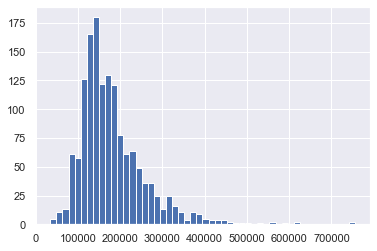

In [14]:
train_test['SalePrice'].hist(bins=50); plt.show()

In [15]:
df = pd.concat([train_test, X_sub]); df.shape

(2919, 81)

In [16]:
df.iloc[:5, :15]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm


In [17]:
df.iloc[:5, 15:30]

,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation
0,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc
1,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock
2,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc
3,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil
4,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc


In [18]:
df.iloc[:5, 30:45]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF
0,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854
1,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0
2,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866
3,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756
4,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053


In [19]:
df.iloc[:5, 45:60]

,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt
0,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0
1,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0
2,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0
3,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0
4,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0


In [20]:
df.iloc[:5, 60:75]

,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature
0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN
1,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN
2,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN
3,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN
4,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN


In [21]:
df.iloc[:5, 75:]

,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,2,2008,WD,Normal,208500.0
1,0,5,2007,WD,Normal,181500.0
2,0,9,2008,WD,Normal,223500.0
3,0,2,2006,WD,Abnorml,140000.0
4,0,12,2008,WD,Normal,250000.0


In [22]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# cols classification

## ob_cols

In [23]:
ob_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        ob_cols.append(col)

In [24]:
for col in ob_cols:
    print('-' * 40)
    print(df[col].value_counts())

----------------------------------------
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
----------------------------------------
Pave    2907
Grvl      12
Name: Street, dtype: int64
----------------------------------------
Grvl    120
Pave     78
Name: Alley, dtype: int64
----------------------------------------
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
----------------------------------------
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
----------------------------------------
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
----------------------------------------
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
----------------------------------------
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
----------------------------------------
NAmes      443
CollgCr    

In [25]:
print(ob_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## na_cols

In [26]:
na_cols = {}
for col in df.columns:
    if df[col].isna().sum() != 0:
        na_cols[col] = df[col].isna().sum()
    else:
        pass

In [27]:
na_cols.keys()

dict_keys(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice'])

# missing val

### obj_na

In [28]:
ob_na_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].isna().sum() != 0:
            ob_na_cols.append(col)
        else:
            pass
    else:
        pass

In [29]:
print(ob_na_cols)

['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [30]:
df[ob_na_cols] = df[ob_na_cols].fillna('0')
df[ob_na_cols].isna().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

### num_na

In [31]:
num_na_cols = []
for col in df.columns:
    if df[col].dtype != 'object':
        if df[col].isna().sum() != 0:
            num_na_cols.append(col)
        else:
            pass
    else:
        pass

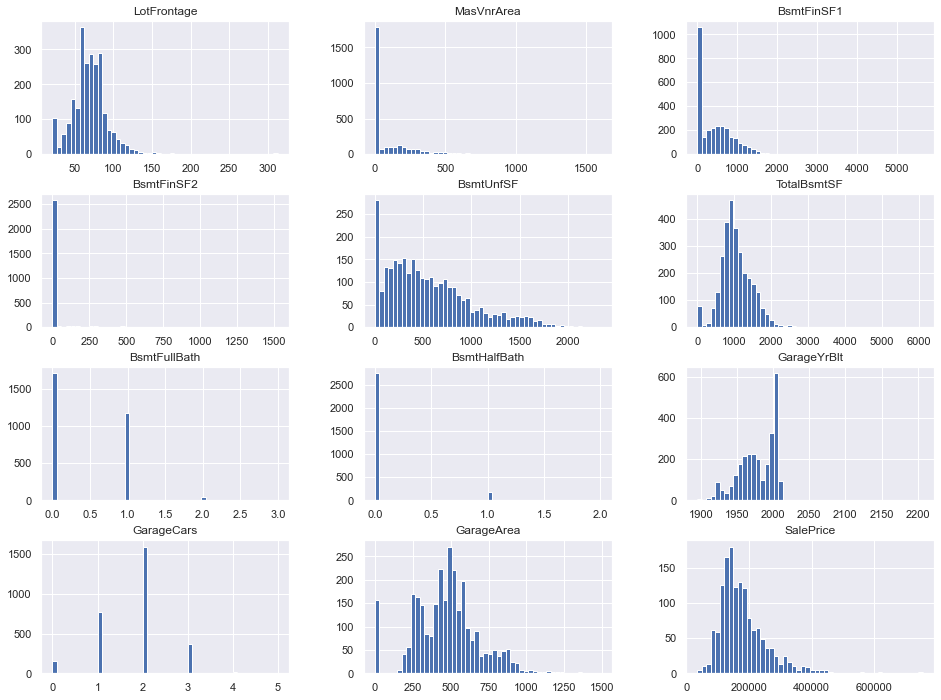

In [32]:
df[num_na_cols].hist(figsize=(16, 12), bins=50); plt.show()

In [33]:
df[num_na_cols].isna().sum() / df.shape[0] * 100

LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

In [34]:
num_na_cols.remove('SalePrice')

In [35]:
num_na_cols

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [36]:
fill_mode = {}

num_na_cols
for col in num_na_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [37]:
df[num_na_cols].isna().sum() / df.shape[0] * 100

LotFrontage     0.0
MasVnrArea      0.0
BsmtFinSF1      0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
TotalBsmtSF     0.0
BsmtFullBath    0.0
BsmtHalfBath    0.0
GarageYrBlt     0.0
GarageCars      0.0
GarageArea      0.0
dtype: float64

# endcoding

In [38]:
print(ob_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [39]:
nominal_cols = ['MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 
                'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 
                'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
                'CentralAir', 'Electrical', 'PavedDrive', 'MiscFeature', 'SaleCondition']
ordinal_cols = ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'HouseStyle', 
                'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional',
                'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                'PoolQC', 'Fence', 'SaleType']

## nominal_cols

In [40]:
oe = OrdinalEncoder()

df[nominal_cols] = oe.fit_transform(df[nominal_cols])
df[nominal_cols].head()

,MSZoning,Street,Alley,LotConfig,Neighborhood,Condition1,Condition2,BldgType,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,PavedDrive,MiscFeature,SaleCondition
0,4.0,1.0,0.0,4.0,5.0,2.0,2.0,0.0,1.0,1.0,13.0,14.0,2.0,2.0,1.0,1.0,5.0,2.0,0.0,4.0
1,4.0,1.0,0.0,2.0,24.0,1.0,2.0,0.0,1.0,1.0,9.0,9.0,3.0,1.0,1.0,1.0,5.0,2.0,0.0,4.0
2,4.0,1.0,0.0,4.0,5.0,2.0,2.0,0.0,1.0,1.0,13.0,14.0,2.0,2.0,1.0,1.0,5.0,2.0,0.0,4.0
3,4.0,1.0,0.0,0.0,6.0,2.0,2.0,0.0,1.0,1.0,14.0,16.0,3.0,0.0,1.0,1.0,5.0,2.0,0.0,0.0
4,4.0,1.0,0.0,2.0,15.0,2.0,2.0,0.0,1.0,1.0,13.0,14.0,2.0,2.0,1.0,1.0,5.0,2.0,0.0,4.0


## ordinal_cols

In [41]:
# lotshape
lotshape_map = {'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4}
df['LotShape'] = df['LotShape'].map(lotshape_map)
df['LotShape'].value_counts()

4    1859
3     968
2      76
1      16
Name: LotShape, dtype: int64

In [42]:
# landcontour
df['LandContour'].value_counts()

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

In [43]:
landcontour_map = {'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}
df['LandContour'] = df['LandContour'].map(landcontour_map)
df['LandContour'].value_counts()

4    2622
2     120
3     117
1      60
Name: LandContour, dtype: int64

In [44]:
# utilities
df['Utilities'].value_counts()

AllPub    2916
0            2
NoSeWa       1
Name: Utilities, dtype: int64

In [45]:
utilities_map = {'0':0, 'NoSeWa':1, 'AllPub':2}
df['Utilities'] = df['Utilities'].map(utilities_map)
df['Utilities'].value_counts()

2    2916
0       2
1       1
Name: Utilities, dtype: int64

In [46]:
# landslope
df['LandSlope'].value_counts()

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

In [47]:
landslope_map = {'Sev':1, 'Mod':2, 'Gtl':3}
df['LandSlope'] = df['LandSlope'].map(landslope_map)
df['LandSlope'].value_counts()

3    2778
2     125
1      16
Name: LandSlope, dtype: int64

In [48]:
# housetyle
df['HouseStyle'].value_counts()

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

In [49]:
housestyle_map = {'1Story':1, '1.5Fin':2, '1.5Unf':3, '2Story':4, '2.5Fin':5, 
                  '2.5Unf':6, 'SFoyer':7, 'SLvl':8, }
df['HouseStyle'] = df['HouseStyle'].map(housestyle_map)
df['HouseStyle'].value_counts()

1    1471
4     872
2     314
8     128
7      83
6      24
3      19
5       8
Name: HouseStyle, dtype: int64

In [50]:
# exter
df[['ExterQual', 'ExterCond']].value_counts()

ExterQual  ExterCond
TA         TA           1523
Gd         TA            900
TA         Gd            220
Ex         TA            101
Gd         Gd             75
TA         Fa             47
Fa         Fa             19
           TA             14
TA         Ex              6
Ex         Ex              3
           Gd              3
Gd         Ex              3
TA         Po              2
Fa         Gd              1
           Po              1
Gd         Fa              1
dtype: int64

In [51]:
qual_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, '0':0, }
df['ExterQual'] = df['ExterQual'].map(qual_map)
df['ExterCond'] = df['ExterCond'].map(qual_map)

In [52]:
df['ExterQual'].value_counts()

3    1798
4     979
5     107
2      35
Name: ExterQual, dtype: int64

In [53]:
df['ExterCond'].value_counts()

3    2538
4     299
2      67
5      12
1       3
Name: ExterCond, dtype: int64

In [54]:
# bsmtqual, bsmtcond
df['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
0       81
Name: BsmtQual, dtype: int64

In [55]:
df['BsmtCond'].value_counts()

TA    2606
Gd     122
Fa     104
0       82
Po       5
Name: BsmtCond, dtype: int64

In [56]:
df['BsmtQual'] = df['BsmtQual'].map(qual_map)
df['BsmtCond'] = df['BsmtCond'].map(qual_map)
df['BsmtQual'].value_counts()

3    1283
4    1209
5     258
2      88
0      81
Name: BsmtQual, dtype: int64

In [57]:
df['BsmtCond'].value_counts()

3    2606
4     122
2     104
0      82
1       5
Name: BsmtCond, dtype: int64

In [58]:
# bsmtexposure
df['BsmtExposure'].value_counts()

No    1904
Av     418
Gd     276
Mn     239
0       82
Name: BsmtExposure, dtype: int64

In [59]:
expose_map = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, '0':0, }
df['BsmtExposure'] = df['BsmtExposure'].map(expose_map)
df['BsmtExposure'].value_counts()

1    1904
3     418
4     276
2     239
0      82
Name: BsmtExposure, dtype: int64

In [60]:
# bsmtfintype
df['BsmtFinType1'].value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
0       79
Name: BsmtFinType1, dtype: int64

In [61]:
df['BsmtFinType2'].value_counts()

Unf    2493
Rec     105
LwQ      87
0        80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [62]:
fintype_map = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, '0':0, }
df['BsmtFinType1'] = df['BsmtFinType1'].map(fintype_map)
df['BsmtFinType2'] = df['BsmtFinType2'].map(fintype_map)
df['BsmtFinType1'].value_counts()

1    851
6    849
5    429
3    288
4    269
2    154
0     79
Name: BsmtFinType1, dtype: int64

In [63]:
df['BsmtFinType2'].value_counts()

1    2493
3     105
2      87
0      80
4      68
5      52
6      34
Name: BsmtFinType2, dtype: int64

In [64]:
# heatingqc
df['HeatingQC'].value_counts()

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

In [65]:
qual_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, '0':0, }
df['HeatingQC'] = df['HeatingQC'].map(qual_map)
df['HeatingQC'].value_counts()

5    1493
3     857
4     474
2      92
1       3
Name: HeatingQC, dtype: int64

In [66]:
# kitchenqual
df['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
0        1
Name: KitchenQual, dtype: int64

In [67]:
df['KitchenQual'] = df['KitchenQual'].map(qual_map)
df['KitchenQual'].value_counts()

3    1492
4    1151
5     205
2      70
0       1
Name: KitchenQual, dtype: int64

In [68]:
# functional
df['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
0          2
Name: Functional, dtype: int64

In [69]:
func_map = {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1, '0':0}
df['Functional'] = df['Functional'].map(func_map)
df['Functional'].value_counts()

8    2717
6      70
7      65
5      35
4      19
3       9
2       2
0       2
Name: Functional, dtype: int64

In [70]:
# fireplacequ
df['FireplaceQu'].value_counts()

0     1420
Gd     744
TA     592
Fa      74
Po      46
Ex      43
Name: FireplaceQu, dtype: int64

In [71]:
df['FireplaceQu'] = df['FireplaceQu'].map(qual_map)
df['FireplaceQu'].value_counts()

0    1420
4     744
3     592
2      74
1      46
5      43
Name: FireplaceQu, dtype: int64

In [72]:
# garagetype
df['GarageType'].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
0           157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [73]:
garagetype_map = {'2Types':6, 'Attchd':5, 'Basment':4, 'BuiltIn':3, 'CarPort':2, 'Detchd':1, '0':0, }
df['GarageType'] = df['GarageType'].map(garagetype_map)
df['GarageType'].value_counts()

5    1723
1     779
3     186
0     157
4      36
6      23
2      15
Name: GarageType, dtype: int64

In [74]:
# garagefinish
df['GarageFinish'].value_counts()

Unf    1230
RFn     811
Fin     719
0       159
Name: GarageFinish, dtype: int64

In [75]:
garagefinish_map = {'0':0, 'Unf':1, 'RFn':2, 'Fin':3}
df['GarageFinish'] = df['GarageFinish'].map(garagefinish_map)
df['GarageFinish'].value_counts()

1    1230
2     811
3     719
0     159
Name: GarageFinish, dtype: int64

In [76]:
# garagequal
df['GarageQual'].value_counts()

TA    2604
0      159
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [77]:
df['GarageQual'] = df['GarageQual'].map(qual_map)
df['GarageQual'].value_counts()

3    2604
0     159
2     124
4      24
1       5
5       3
Name: GarageQual, dtype: int64

In [78]:
# garagecond
df['GarageCond'].value_counts()

TA    2654
0      159
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [79]:
df['GarageCond'] = df['GarageCond'].map(qual_map)
df['GarageCond'].value_counts()

3    2654
0     159
2      74
4      15
1      14
5       3
Name: GarageCond, dtype: int64

In [80]:
# poolqc
df['PoolQC'].value_counts()

0     2909
Ex       4
Gd       4
Fa       2
Name: PoolQC, dtype: int64

In [81]:
df['PoolQC'] = df['PoolQC'].map(qual_map)
df['PoolQC'].value_counts()

0    2909
5       4
4       4
2       2
Name: PoolQC, dtype: int64

In [82]:
# fence
df['Fence'].value_counts()

0        2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [83]:
fence_map = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, '0':0, }
df['Fence'] = df['Fence'].map(fence_map)
df['Fence'].value_counts()

0    2348
3     329
4     118
2     112
1      12
Name: Fence, dtype: int64

In [84]:
# saletype
df['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
0           1
Name: SaleType, dtype: int64

In [85]:
saletype_map = {'WD':10, 'CWD':9, 'VWD':8, 'New':7, 'COD':6, 
                'Con':5, 'ConLw':4, 'ConLI':3, 'ConLD':2, 'Oth':1, '0':0}
df['SaleType'] = df['SaleType'].map(saletype_map)
df['SaleType'].value_counts()

10    2525
7      239
6       87
2       26
9       12
3        9
4        8
1        7
5        5
0        1
Name: SaleType, dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   float64
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   float64
 6   Alley          2919 non-null   float64
 7   LotShape       2919 non-null   int64  
 8   LandContour    2919 non-null   int64  
 9   Utilities      2919 non-null   int64  
 10  LotConfig      2919 non-null   float64
 11  LandSlope      2919 non-null   int64  
 12  Neighborhood   2919 non-null   float64
 13  Condition1     2919 non-null   float64
 14  Condition2     2919 non-null   float64
 15  BldgType       2919 non-null   float64
 16  HouseStyle     2919 non-null   int64  
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [87]:
df.isna().sum()[df.isna().sum() > 0]

SalePrice    1459
dtype: int64

# df00

In [88]:
print(df.isna().sum().sort_values(ascending=False))

SalePrice      1459
CentralAir        0
GarageYrBlt       0
GarageType        0
FireplaceQu       0
               ... 
MasVnrArea        0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
HeatingQC         0
Length: 81, dtype: int64


In [89]:
df00 = df.drop('Id', axis=1)

## met

----------------------------------------
model = LinearRegression
RMSE  = 2981924198.2598166


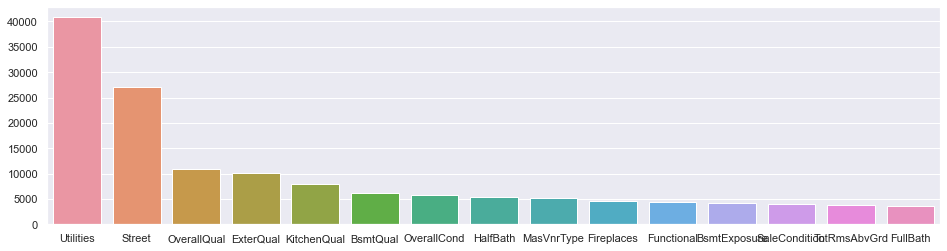

----------------------------------------
model = Ridge
RMSE  = 2913008328.276552


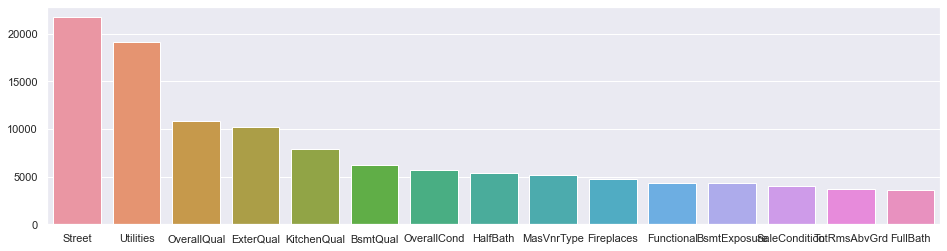

----------------------------------------
model = Lasso
RMSE  = 2980493459.5821037


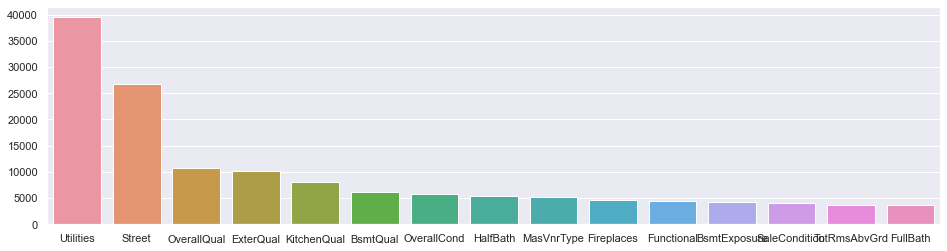

----------------------------------------
model = ElasticNet
RMSE  = 2405477144.0129733


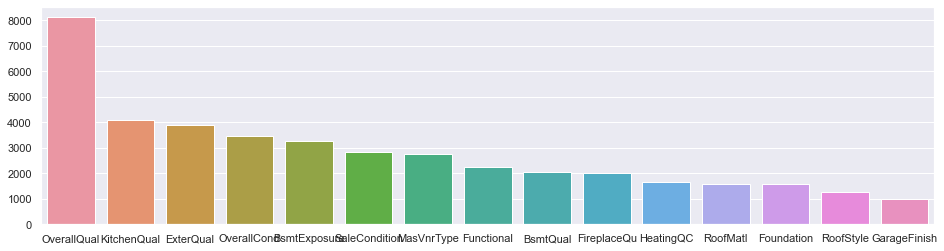

----------------------------------------
model = XGBRegressor
RMSE  = 2478257885.914523


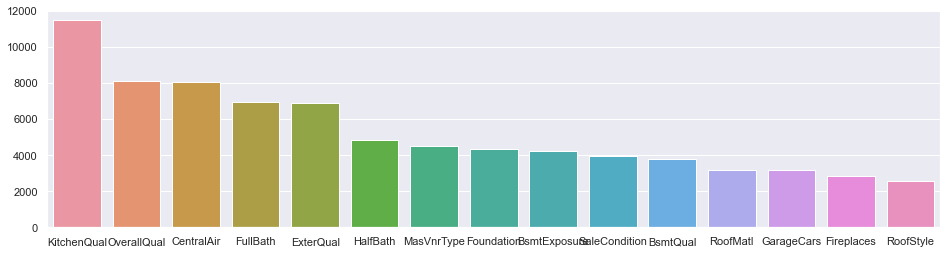

In [90]:
# regression cross_validate : INPUT DF VERSION & TARGET
# ==================================================
df_met     = df00
target_met = 'SalePrice'
# ==================================================

# X, y split
train_test_met   = df_met[df_met[target_met].notna()]
X_sub            = df_met[df_met[target_met].isna()]
X_train_test_met = train_test_met.drop(target_met, axis=1)
y_train_test_met = train_test_met[target_met]
X_train, X_test, y_train, y_test = train_test_split(X_train_test_met, y_train_test_met, test_size=0.2, random_state=0, shuffle=True)

# estimators=
regressor_models = [
                    LinearRegression      (),
                    # DecisionTreeRegressor (random_state=0),
                    Ridge                 (random_state=0),
                    Lasso                 (random_state=0),
                    ElasticNet            (random_state=0),
                    # RandomForestRegressor (random_state=0),
                    XGBRegressor          (random_state=0, booster='gblinear'),
                    # LGBMRegressor         (random_state=0),
                    # CatBoostRegressor     (random_state=0, verbose=0),
                    ]

for model in regressor_models:
    
    print('-' * 40)
    print('model =', model.__class__.__name__)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    rmse   = mean_squared_error(y_test, y_pred)
    print('RMSE  =', rmse)
    model_coef = pd.DataFrame(model.coef_, index=X_train_test_met.columns).sort_values(by=0, ascending=False).head(15).T
    f, ax = plt.subplots(figsize=(16, 4))
    sns.barplot(data=model_coef)
    plt.show()

----------------------------------------
model = DecisionTreeRegressor
RMSE  = 2658338271.8287673


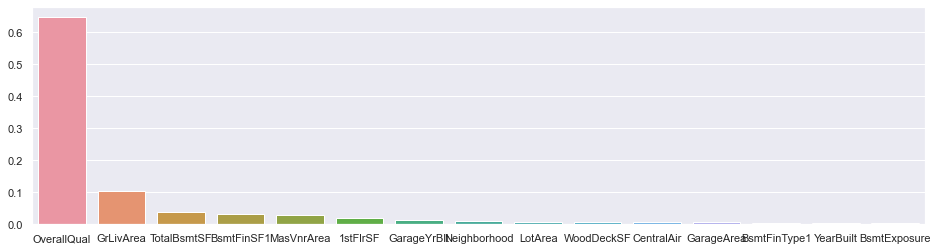

----------------------------------------
model = RandomForestRegressor
RMSE  = 1082475364.6368551


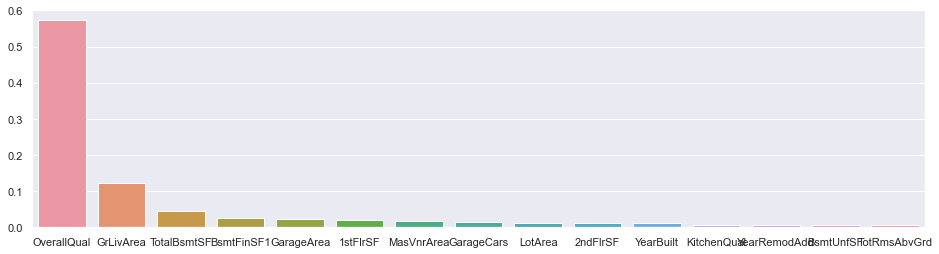

----------------------------------------
model = LGBMRegressor
RMSE  = 1032157274.7600863


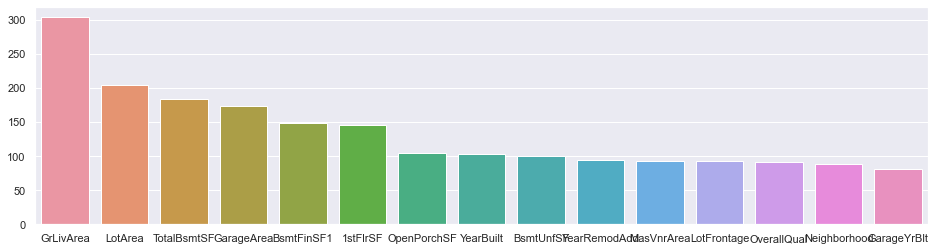

----------------------------------------
model = CatBoostRegressor
RMSE  = 834236377.2173593


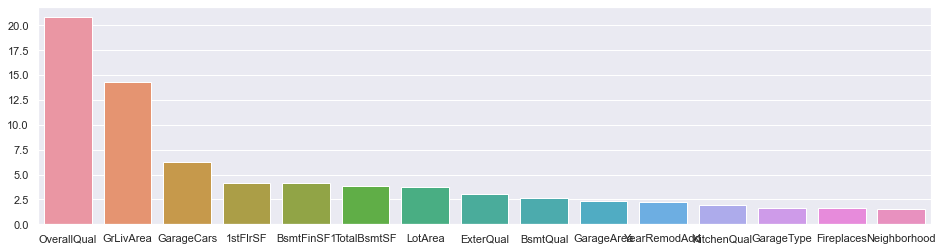

In [91]:
# regression cross_validate : INPUT DF VERSION & TARGET
# ==================================================
df_met     = df00
target_met = 'SalePrice'
# ==================================================

# X, y split
train_test_met   = df_met[df_met[target_met].notna()]
X_sub            = df_met[df_met[target_met].isna()]
X_train_test_met = train_test_met.drop(target_met, axis=1)
y_train_test_met = train_test_met[target_met]
X_train, X_test, y_train, y_test = train_test_split(X_train_test_met, y_train_test_met, test_size=0.2, random_state=0, shuffle=True)

# estimators=
regressor_models = [
                    # LinearRegression      (),
                    DecisionTreeRegressor (random_state=0),
                    # Ridge                 (random_state=0),
                    # Lasso                 (random_state=0),
                    # ElasticNet            (random_state=0),
                    RandomForestRegressor (random_state=0),
                    # XGBRegressor          (random_state=0, booster='gblinear'),
                    LGBMRegressor         (random_state=0),
                    CatBoostRegressor     (random_state=0, verbose=0),
                    ]

for model in regressor_models:
    
    print('-' * 40)
    print('model =', model.__class__.__name__)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    rmse   = mean_squared_error(y_test, y_pred)
    print('RMSE  =', rmse)
    model_coef = pd.DataFrame(model.feature_importances_, index=X_train_test_met.columns).sort_values(by=0, ascending=False).head(15).T
    f, ax = plt.subplots(figsize=(16, 4))
    sns.barplot(data=model_coef)
    plt.show()

## submission

In [92]:
sub_pred = model.predict(X_sub)
sub_pred

array([120968.43014575, 169454.67800818, 185038.5277102 , ...,
       172460.66849807, 115616.40298556, 221452.59438434])

In [93]:
y_sub = pd.read_csv('./sample_submission.csv')

In [94]:
y_sub['SalePrice'] = sub_pred
y_sub

,Id,SalePrice
0,1461,120968.430146
1,1462,169454.678008
2,1463,185038.527710
3,1464,189241.259455
4,1465,190781.159118
...,...,...
1454,2915,76774.687188
1455,2916,83224.860735
1456,2917,172460.668498
1457,2918,115616.402986


In [95]:
y_sub.to_csv('./sub_v03_pjh.csv', index=False)

# df01 : df00 + log + scale

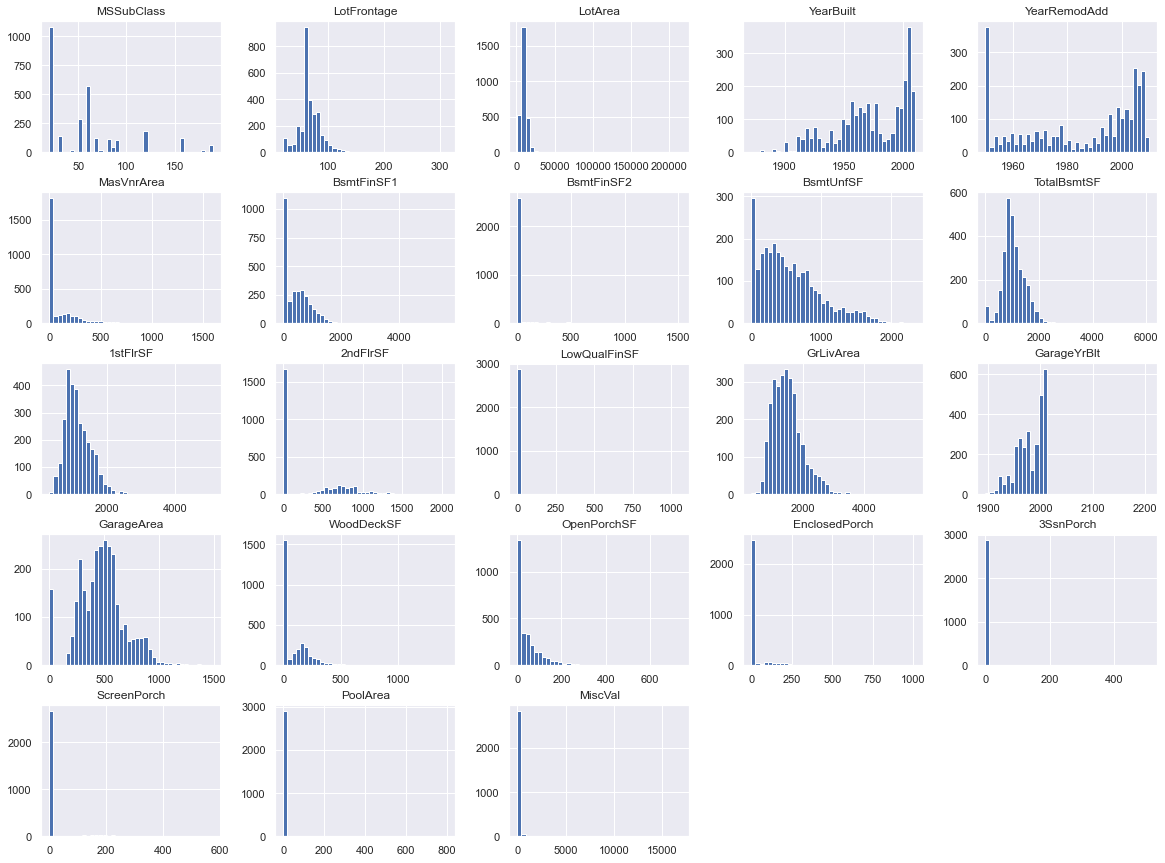

In [96]:
scale_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 
              'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
              '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 
              'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
df00[scale_cols].hist(figsize=(20, 15), bins=40); plt.show()

In [97]:
df01 = df00
train_test = df01[df01['SalePrice'].notna()]
sub        = df01[df01['SalePrice'].isna()]

X_train_test = train_test.drop('SalePrice', axis=1)
y_train_test = train_test['SalePrice']
X_sub        = sub.drop('SalePrice', axis=1)

train_test.shape, X_train_test.shape, y_train_test.shape, X_sub.shape

((1460, 80), (1460, 79), (1460,), (1459, 79))

## log

In [98]:
X_train_test[scale_cols]  = np.log1p(X_train_test[scale_cols])
X_sub       [scale_cols]  = np.log1p(X_sub       [scale_cols])

In [99]:
y_train_test = pd.Series(np.log1p(y_train_test), name='SalePrice')
y_train_test.shape

(1460,)

## scale

In [100]:
ss = StandardScaler()

ss.fit(X_train_test[scale_cols])

X_train_test[scale_cols] = ss.transform(X_train_test[scale_cols])
X_sub       [scale_cols] = ss.transform(X_sub       [scale_cols])

In [101]:
train_test = pd.concat([X_train_test, y_train_test], axis=1)
train_test.shape

(1460, 80)

In [102]:
df01 = pd.concat([train_test, X_sub])
df01.shape

(2919, 80)

In [103]:
df01.isna().sum().sum()

1459

## metrics

----------------------------------------
model = LinearRegression
RMSE  = 0.03436113082606369


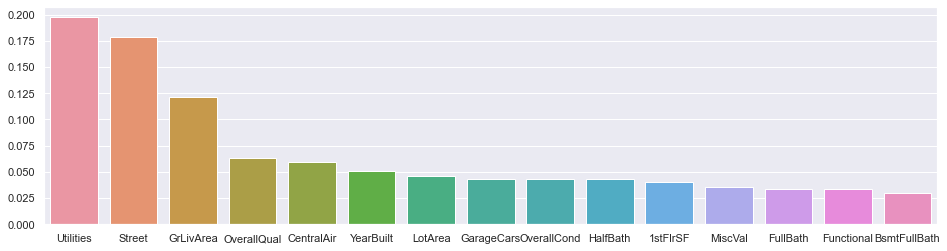

----------------------------------------
model = Ridge
RMSE  = 0.03330931417178139


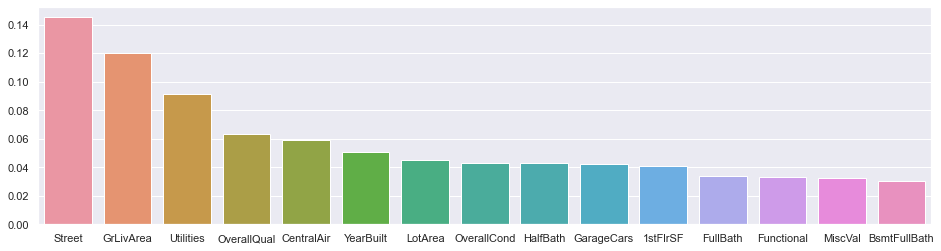

----------------------------------------
model = Lasso
RMSE  = 0.15141016666491292


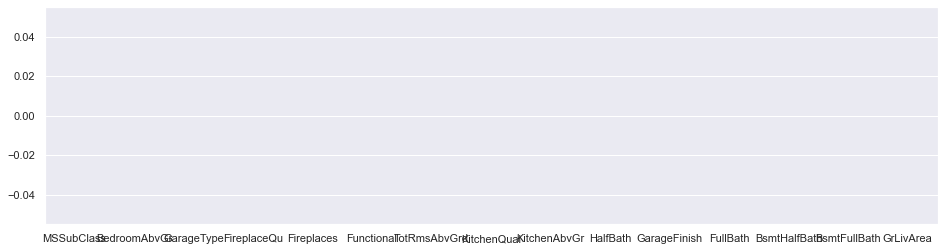

----------------------------------------
model = ElasticNet
RMSE  = 0.15141016666491292


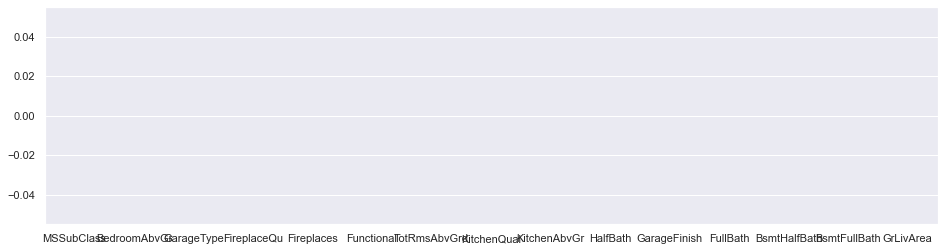

----------------------------------------
model = XGBRegressor
RMSE  = 0.06916213118352914


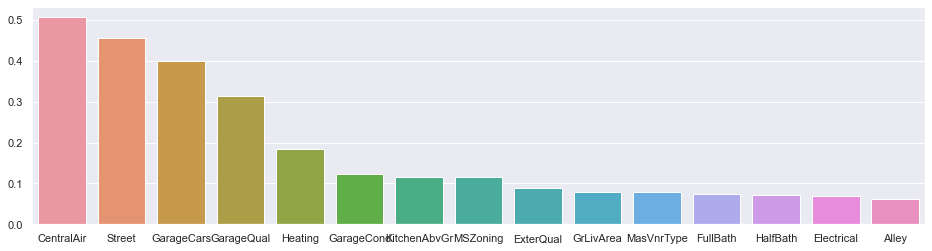

In [104]:
# regression cross_validate : INPUT DF VERSION & TARGET
# ==================================================
df_met     = df01
target_met = 'SalePrice'
# ==================================================

# X, y split
train_test_met   = df_met[df_met[target_met].notna()]
X_sub            = df_met[df_met[target_met].isna()]
X_train_test_met = train_test_met.drop(target_met, axis=1)
y_train_test_met = train_test_met[target_met]
X_train, X_test, y_train, y_test = train_test_split(X_train_test_met, y_train_test_met, test_size=0.2, random_state=0, shuffle=True)

# estimators=
regressor_models = [
                    LinearRegression      (),
                    # DecisionTreeRegressor (random_state=0),
                    Ridge                 (random_state=0),
                    Lasso                 (random_state=0),
                    ElasticNet            (random_state=0),
                    # RandomForestRegressor (random_state=0),
                    XGBRegressor          (random_state=0, booster='gblinear'),
                    # LGBMRegressor         (random_state=0),
                    # CatBoostRegressor     (random_state=0, verbose=0),
                    ]

for model in regressor_models:
    
    print('-' * 40)
    print('model =', model.__class__.__name__)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    rmse   = mean_squared_error(y_test, y_pred)
    print('RMSE  =', rmse)
    model_coef = pd.DataFrame(model.coef_, index=X_train_test_met.columns).sort_values(by=0, ascending=False).head(15).T
    f, ax = plt.subplots(figsize=(16, 4))
    sns.barplot(data=model_coef)
    plt.show()

----------------------------------------
model = DecisionTreeRegressor
RMSE  = 0.04505846291504353


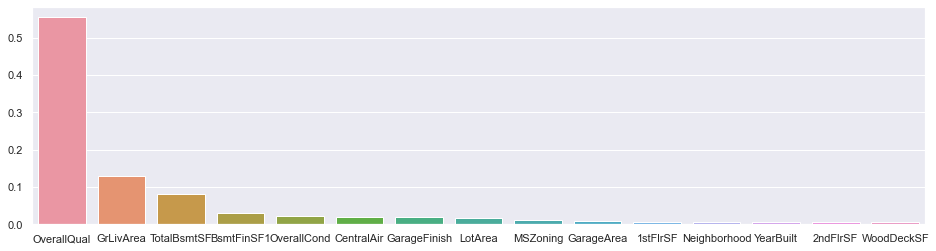

----------------------------------------
model = RandomForestRegressor
RMSE  = 0.018518866286354633


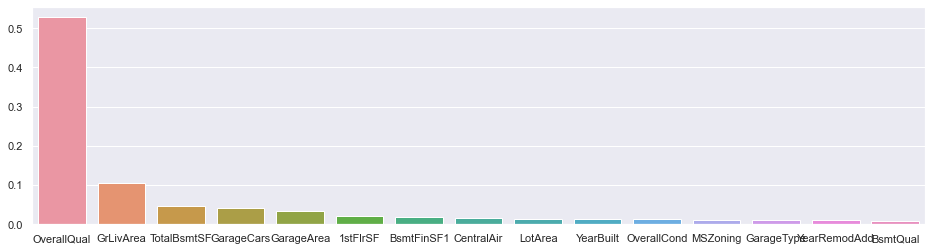

----------------------------------------
model = LGBMRegressor
RMSE  = 0.017469806921918005


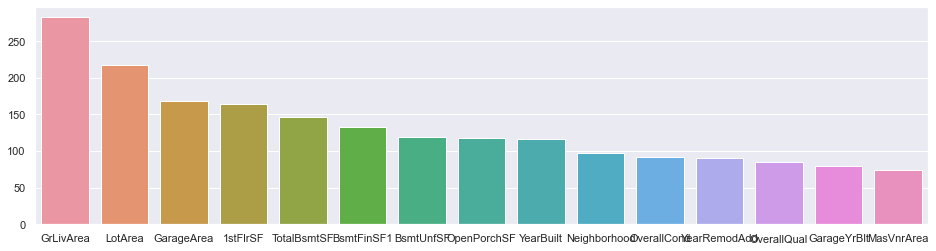

----------------------------------------
model = CatBoostRegressor
RMSE  = 0.016157964035461277


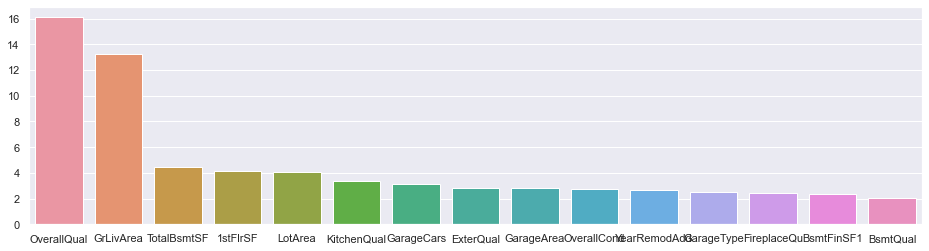

In [105]:
# regression cross_validate : INPUT DF VERSION & TARGET
# ==================================================
df_met     = df01
target_met = 'SalePrice'
# ==================================================

# X, y split
train_test_met   = df_met[df_met[target_met].notna()]
X_sub            = df_met[df_met[target_met].isna()]
X_train_test_met = train_test_met.drop(target_met, axis=1)
y_train_test_met = train_test_met[target_met]
X_train, X_test, y_train, y_test = train_test_split(X_train_test_met, y_train_test_met, test_size=0.2, random_state=0, shuffle=True)

# estimators=
regressor_models = [
                    # LinearRegression      (),
                    DecisionTreeRegressor (random_state=0),
                    # Ridge                 (random_state=0),
                    # Lasso                 (random_state=0),
                    # ElasticNet            (random_state=0),
                    RandomForestRegressor (random_state=0),
                    # XGBRegressor          (random_state=0, booster='gblinear'),
                    LGBMRegressor         (random_state=0),
                    CatBoostRegressor     (random_state=0, verbose=0),
                    ]

for model in regressor_models:
    
    print('-' * 40)
    print('model =', model.__class__.__name__)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    rmse   = mean_squared_error(y_test, y_pred)
    print('RMSE  =', rmse)
    model_coef = pd.DataFrame(model.feature_importances_, index=X_train_test_met.columns).sort_values(by=0, ascending=False).head(15).T
    f, ax = plt.subplots(figsize=(16, 4))
    sns.barplot(data=model_coef)
    plt.show()

## submission

In [106]:
sub_pred = model.predict(X_sub)
sub_pred

array([11.73000704, 12.03109147, 12.15875979, ..., 12.0369413 ,
       11.63523417, 12.24531775])

In [107]:
sub_pred = np.expm1(sub_pred)
sub_pred

array([124243.54443901, 167893.56547451, 190756.78989256, ...,
       168878.59842777, 113009.29129894, 208004.07289728])

In [108]:
sub_pred.shape

(1459,)

In [109]:
y_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [110]:
y_sub['SalePrice'] = sub_pred

In [111]:
y_sub

,Id,SalePrice
0,1461,124243.544439
1,1462,167893.565475
2,1463,190756.789893
3,1464,188352.750814
4,1465,185391.392445
...,...,...
1454,2915,75908.298315
1455,2916,80498.113403
1456,2917,168878.598428
1457,2918,113009.291299


In [112]:
y_sub.to_csv('./sub_pjh.csv', index=False)

# df02 : df00 + log + rob

In [113]:
train_test = df00[df00['SalePrice'].notna()]
sub        = df00[df00['SalePrice'].isna()]

X_train_test = train_test.drop('SalePrice', axis=1)
y_train_tset = train_test['SalePrice']
X_sub        = sub.drop('SalePrice', axis=1)
y_sub        = sub['SalePrice']

X_train_test.shape, y_train_tset.shape, X_sub.shape, y_sub.shape, 

((1460, 79), (1460,), (1459, 79), (1459,))

## log : cont_cols

In [114]:
X_train_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,4.0,65.0,8450,1.0,0.0,4,4,2,4.0,...,0,0,0,0,0.0,0,2,2008,10,4.0
1,20,4.0,80.0,9600,1.0,0.0,4,4,2,2.0,...,0,0,0,0,0.0,0,5,2007,10,4.0
2,60,4.0,68.0,11250,1.0,0.0,3,4,2,4.0,...,0,0,0,0,0.0,0,9,2008,10,4.0
3,70,4.0,60.0,9550,1.0,0.0,3,4,2,0.0,...,0,0,0,0,0.0,0,2,2006,10,0.0
4,60,4.0,84.0,14260,1.0,0.0,3,4,2,2.0,...,0,0,0,0,0.0,0,12,2008,10,4.0


In [115]:
dist_cols = []
cont_cols = []

for col in X_train_test.columns:
    
    if X_train_test[col].nunique() < train_test.shape[0] * 0.05:
        dist_cols.append(col)
    else:
        cont_cols.append(col)

print(dist_cols)
print(cont_cols)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
['LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYr

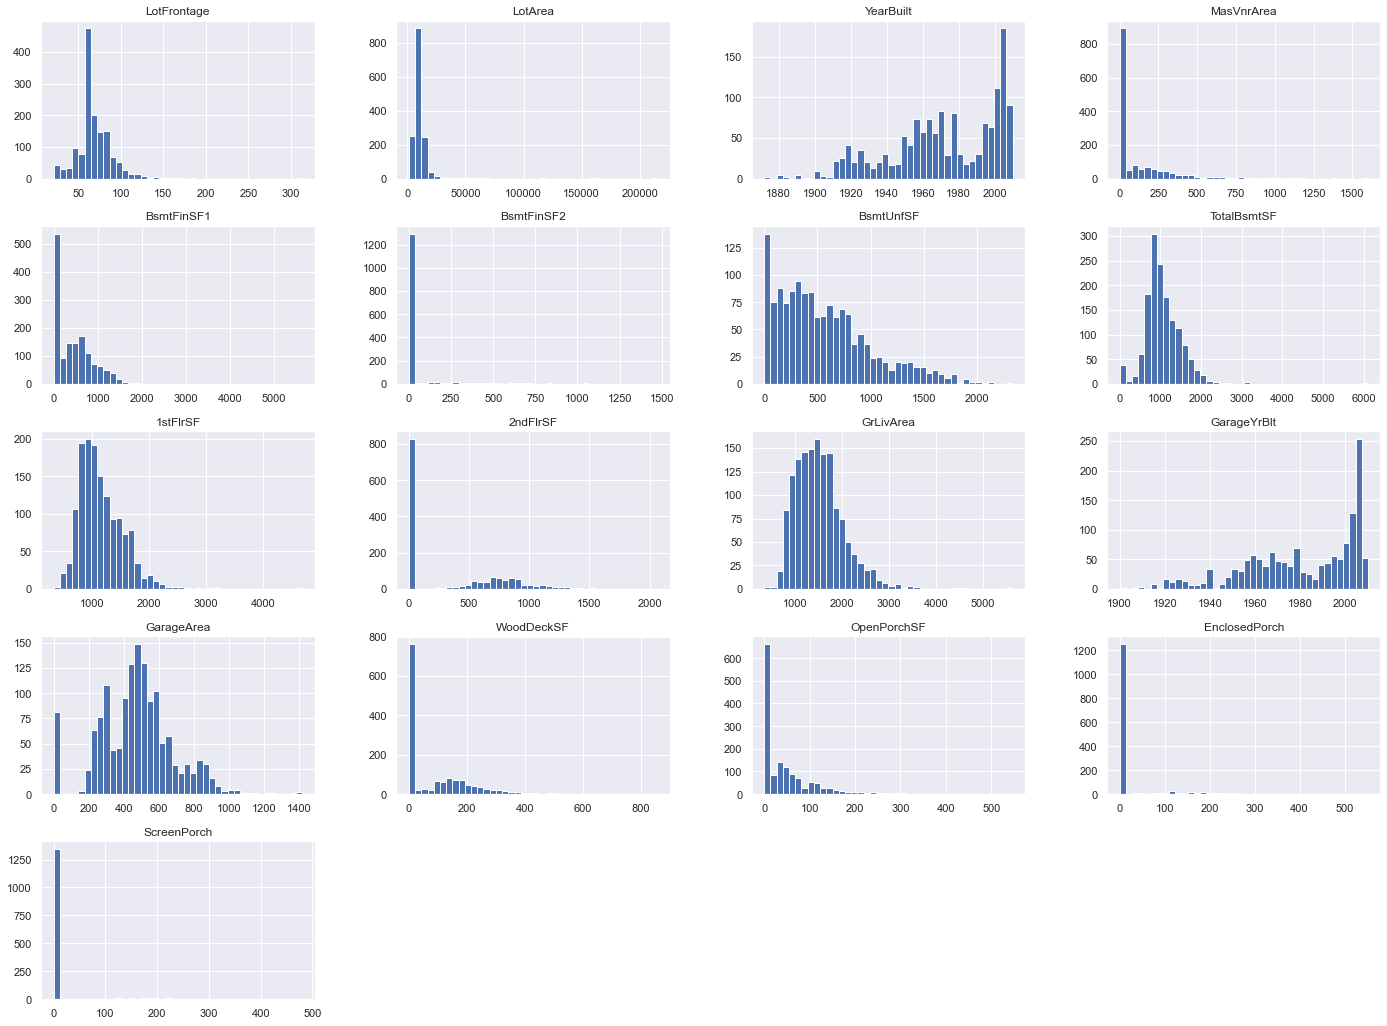

In [116]:
X_train_test[cont_cols].hist(figsize=(24, 18), bins=40); plt.show()

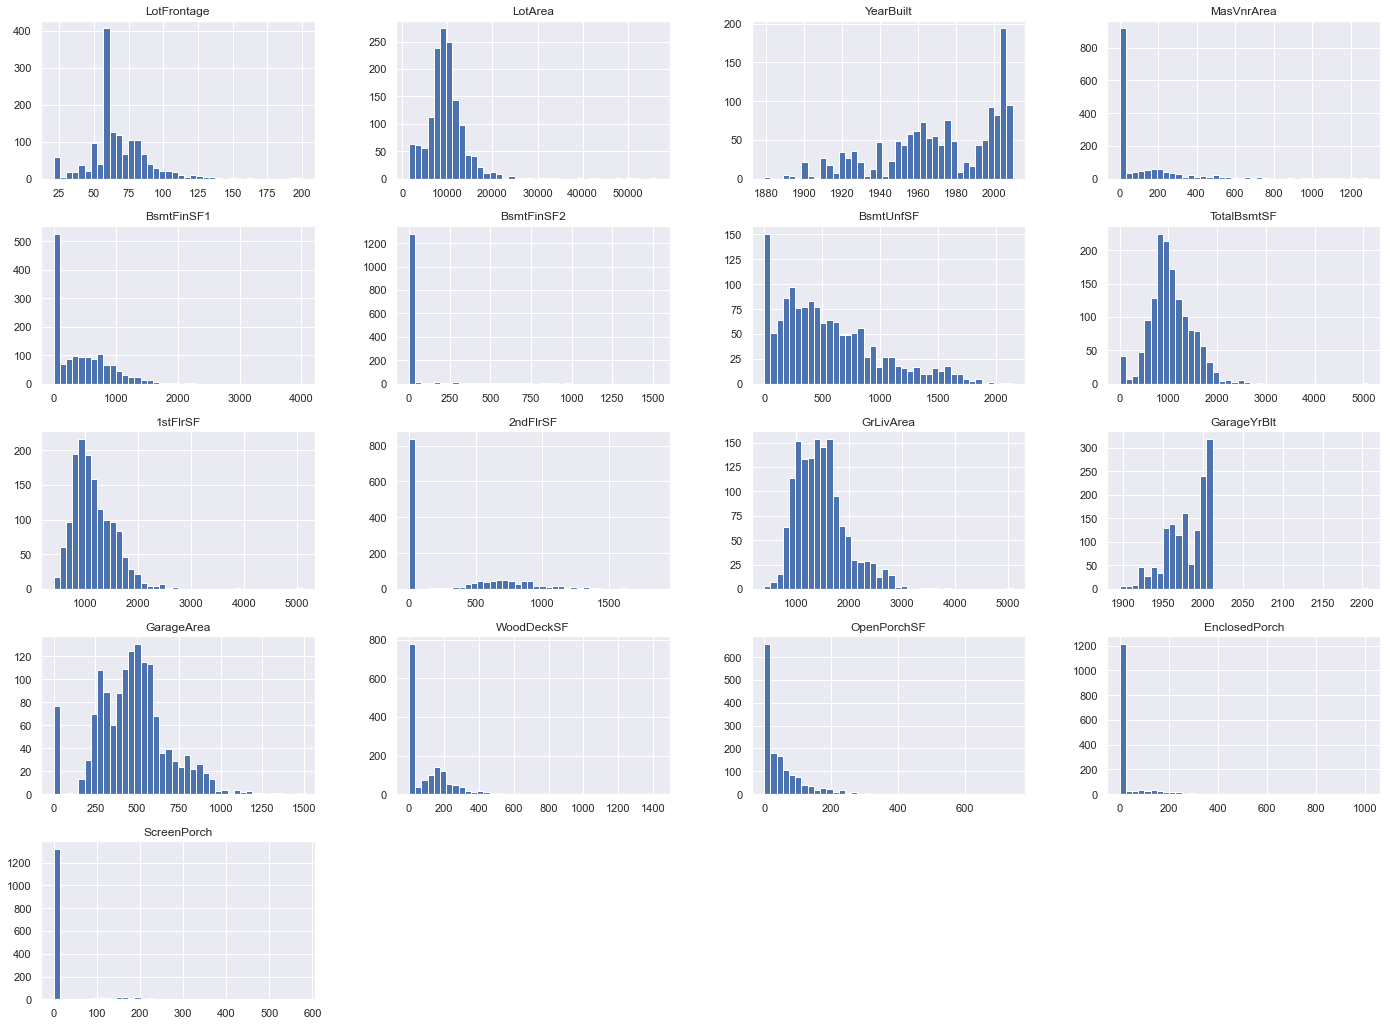

In [117]:
X_sub[cont_cols].hist(figsize=(24, 18), bins=40); plt.show()

In [118]:
X_train_test[cont_cols] = np.log1p(X_train_test[cont_cols])
X_sub[cont_cols]        = np.log1p(X_sub[cont_cols])

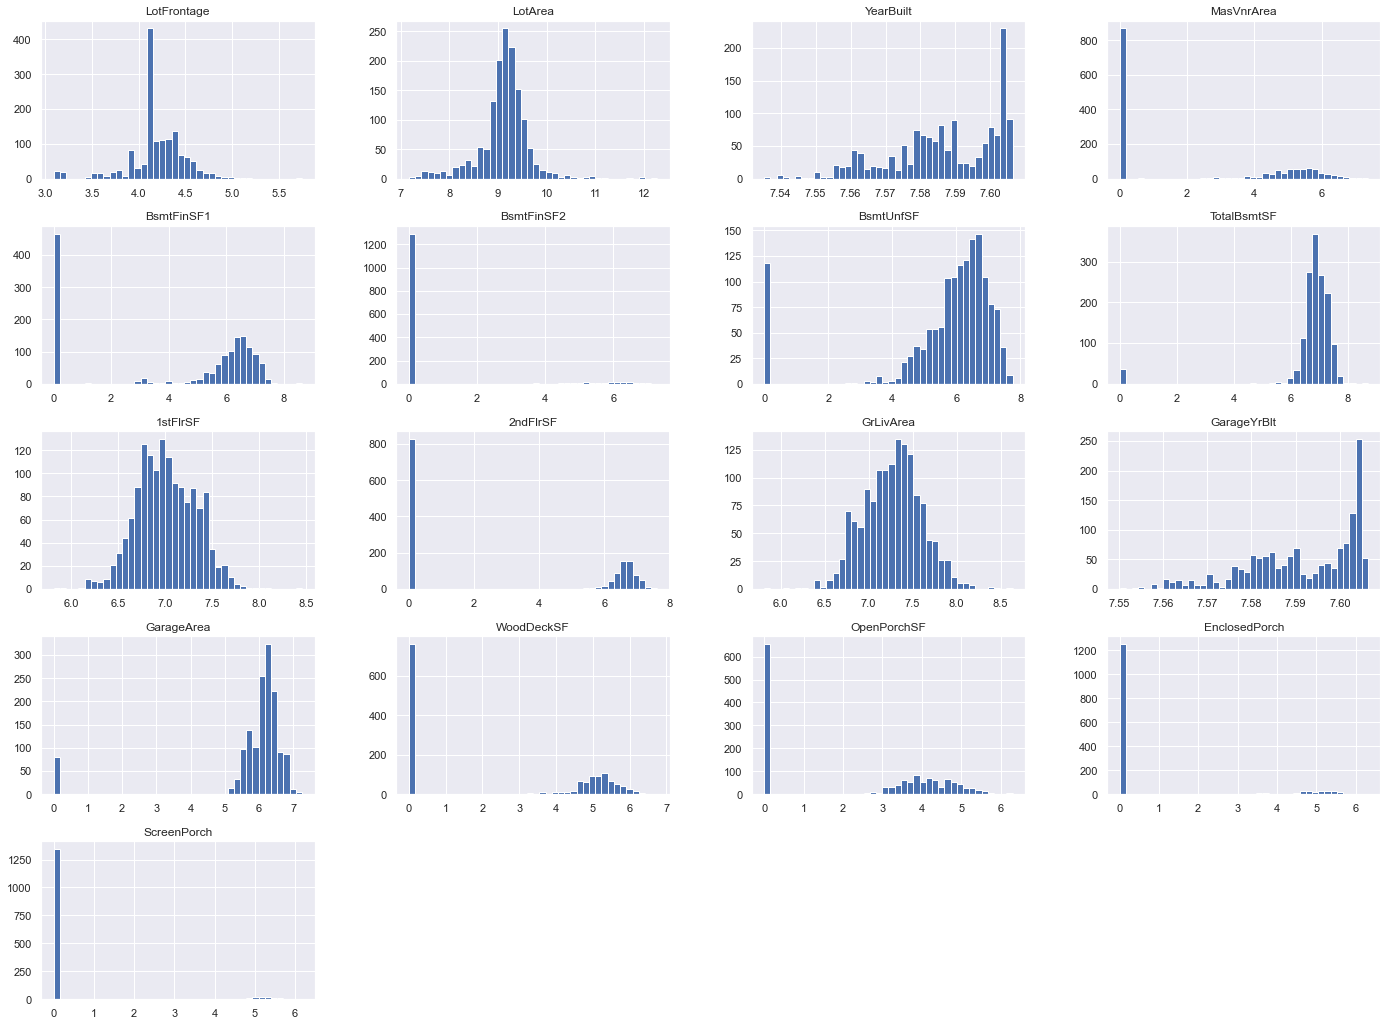

In [119]:
X_train_test[cont_cols].hist(figsize=(24, 18), bins=40); plt.show()

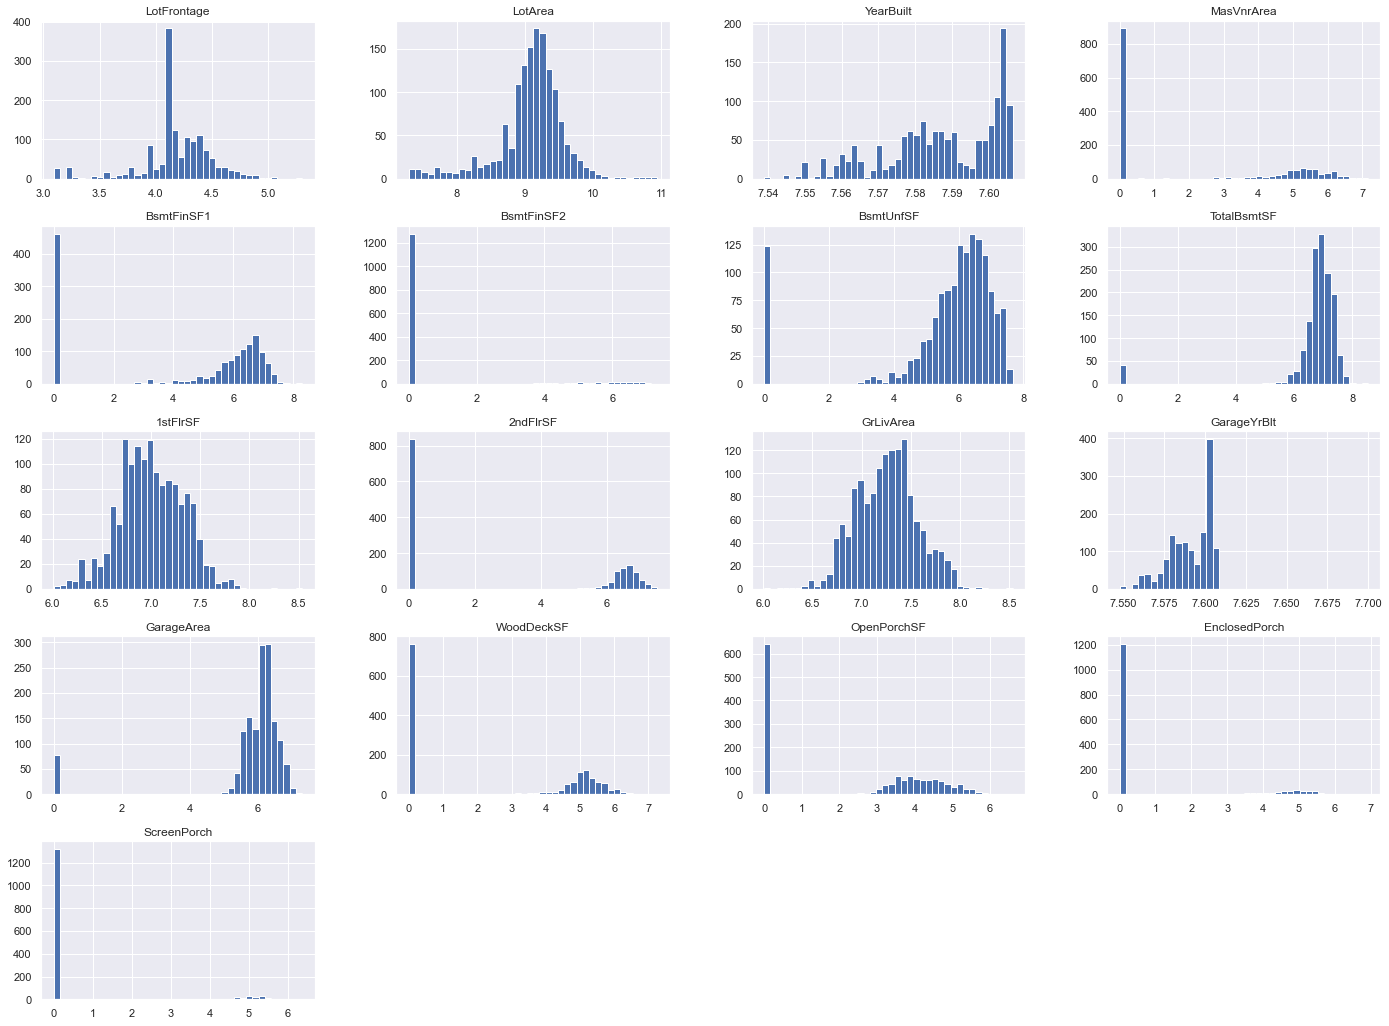

In [120]:
X_sub[cont_cols].hist(figsize=(24, 18), bins=40); plt.show()

## rbscale

In [121]:
rbs = RobustScaler()

rbs.fit(X_train_test)

X_train_test = pd.DataFrame(rbs.transform(X_train_test), columns=X_train_test.columns)
X_sub        = pd.DataFrame(rbs.transform(X_sub), columns=X_train_test.columns)

In [122]:
X_train_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.2,0.0,0.113485,-0.267660,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.0,0.0
1,-0.6,0.0,0.868758,0.029682,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,0.0,0.0
2,0.2,0.0,0.277421,0.399288,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
3,0.4,0.0,-0.177056,0.017513,0.0,0.0,-1.0,0.0,0.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,0.0,-4.0
4,0.2,0.0,1.046525,0.951802,0.0,0.0,-1.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0


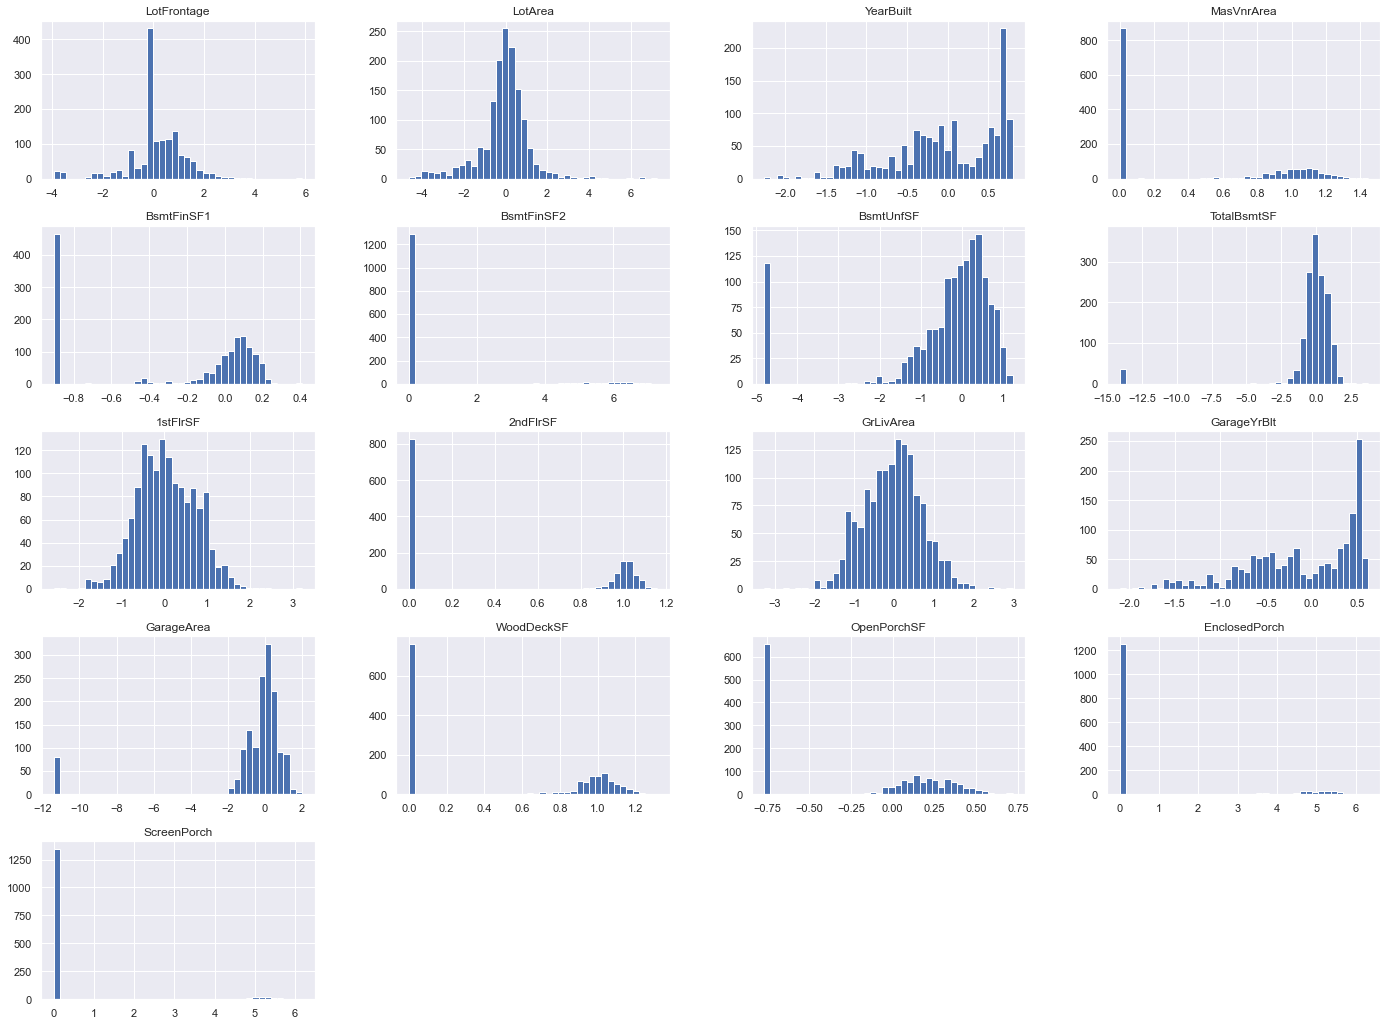

In [123]:
X_train_test[cont_cols].hist(figsize=(24, 18), bins=40); plt.show()

In [124]:
X_train_test.shape, y_train_tset.shape, X_sub.shape, y_sub.shape

((1460, 79), (1460,), (1459, 79), (1459,))

In [125]:
train_test = pd.concat([X_train_test, y_train_test], axis=1)
print(train_test.shape)
train_test.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.2,0.0,0.113485,-0.267660,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.0,0.0,12.247699
1,-0.6,0.0,0.868758,0.029682,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,0.0,0.0,12.109016
2,0.2,0.0,0.277421,0.399288,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,12.317171
3,0.4,0.0,-0.177056,0.017513,0.0,0.0,-1.0,0.0,0.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,0.0,-4.0,11.849405
4,0.2,0.0,1.046525,0.951802,0.0,0.0,-1.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0,12.429220


In [126]:
df02 = pd.concat([train_test, X_sub])
print(df02.shape)
df02.head()

(2919, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.2,0.0,0.113485,-0.267660,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.0,0.0,12.247699
1,-0.6,0.0,0.868758,0.029682,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,0.0,0.0,12.109016
2,0.2,0.0,0.277421,0.399288,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,12.317171
3,0.4,0.0,-0.177056,0.017513,0.0,0.0,-1.0,0.0,0.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,0.0,-4.0,11.849405
4,0.2,0.0,1.046525,0.951802,0.0,0.0,-1.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0,12.429220


## metrics

----------------------------------------
model = LinearRegression
RMSE  = 0.03269063448834958


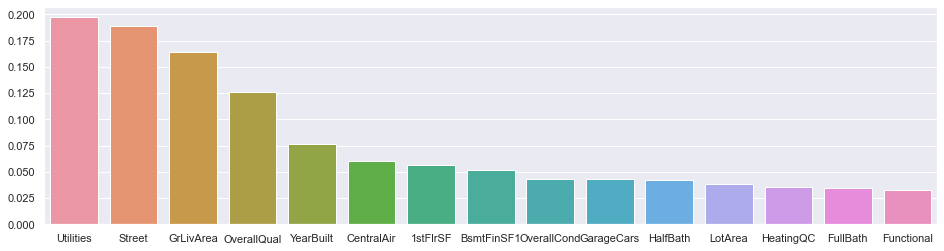

----------------------------------------
model = Ridge
RMSE  = 0.03191429754829535


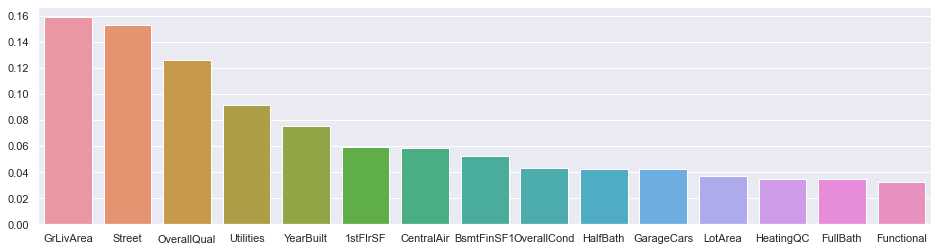

----------------------------------------
model = Lasso
RMSE  = 0.15143062495659293


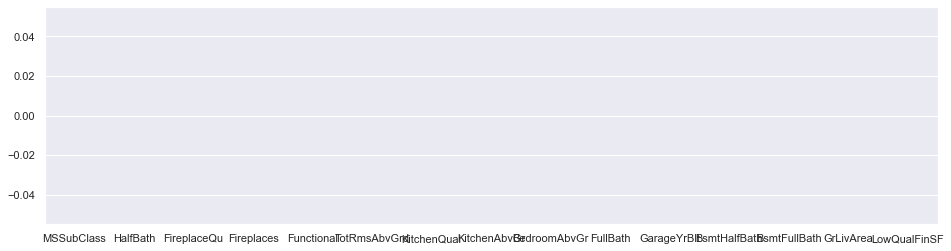

----------------------------------------
model = ElasticNet
RMSE  = 0.15105778076175305


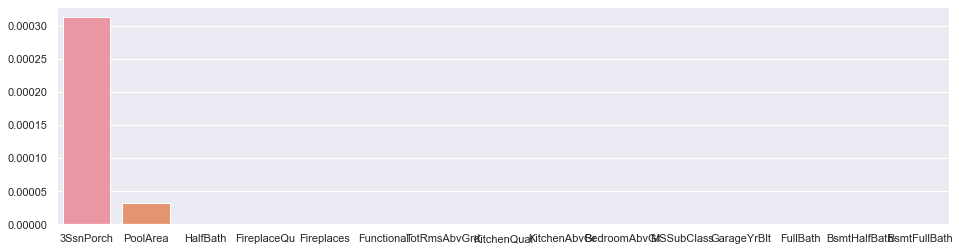

----------------------------------------
model = XGBRegressor
RMSE  = 0.1461968787066095


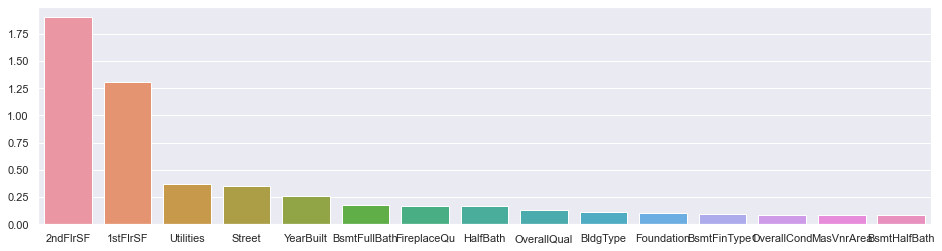

In [127]:
# regression cross_validate : INPUT DF VERSION & TARGET
# ==================================================
df_met     = df02
target_met = 'SalePrice'
# ==================================================

# X, y split
train_test_met   = df_met[df_met[target_met].notna()]
X_sub            = df_met[df_met[target_met].isna()]
X_train_test_met = train_test_met.drop(target_met, axis=1)
y_train_test_met = train_test_met[target_met]
X_train, X_test, y_train, y_test = train_test_split(X_train_test_met, y_train_test_met, test_size=0.2, random_state=0, shuffle=True)

# estimators=
regressor_models = [
                    LinearRegression      (),
                    # DecisionTreeRegressor (random_state=0),
                    Ridge                 (random_state=0),
                    Lasso                 (random_state=0),
                    ElasticNet            (random_state=0),
                    # RandomForestRegressor (random_state=0),
                    XGBRegressor          (random_state=0, booster='gblinear'),
                    # LGBMRegressor         (random_state=0),
                    # CatBoostRegressor     (random_state=0, verbose=0),
                    ]

for model in regressor_models:
    
    print('-' * 40)
    print('model =', model.__class__.__name__)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    rmse   = mean_squared_error(y_test, y_pred)
    print('RMSE  =', rmse)
    model_coef = pd.DataFrame(model.coef_, index=X_train_test_met.columns).sort_values(by=0, ascending=False).head(15).T
    f, ax = plt.subplots(figsize=(16, 4))
    sns.barplot(data=model_coef)
    plt.show()

----------------------------------------
model = DecisionTreeRegressor
RMSE  = 0.04513420613238602


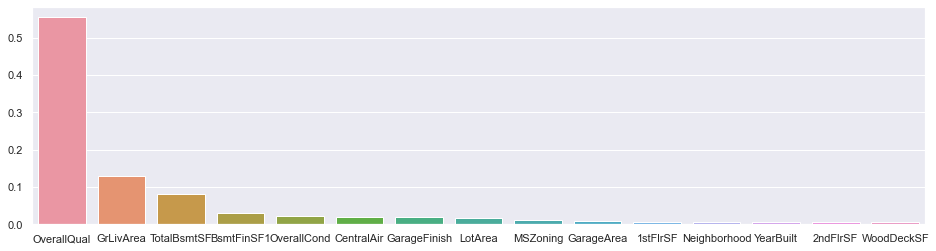

----------------------------------------
model = RandomForestRegressor
RMSE  = 0.018521460551115802


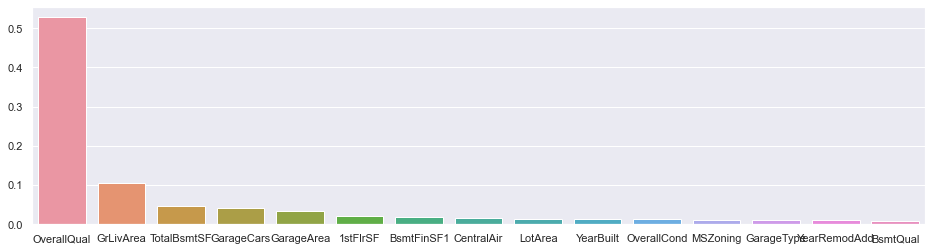

----------------------------------------
model = LGBMRegressor
RMSE  = 0.018109788147581705


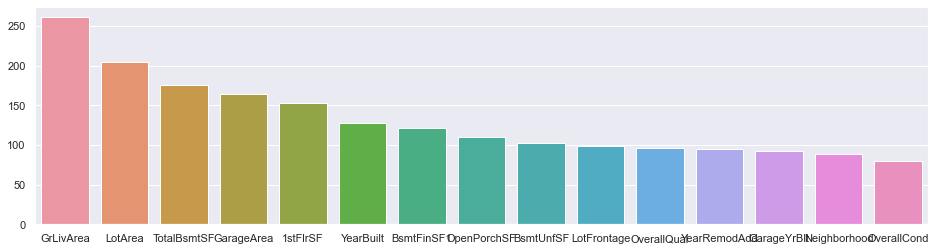

----------------------------------------
model = CatBoostRegressor
RMSE  = 0.016157964035461277


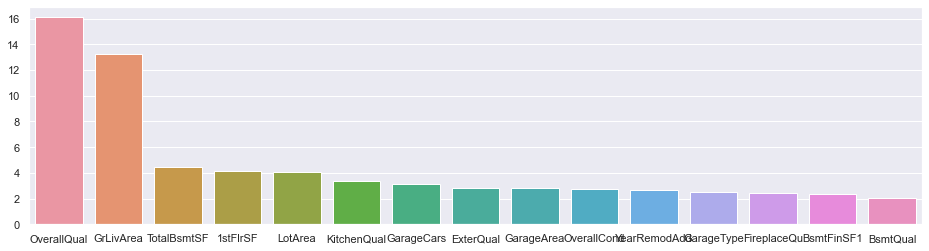

In [128]:
# regression cross_validate : INPUT DF VERSION & TARGET
# ==================================================
df_met     = df02
target_met = 'SalePrice'
# ==================================================

# X, y split
train_test_met   = df_met[df_met[target_met].notna()]
X_sub            = df_met[df_met[target_met].isna()]
X_train_test_met = train_test_met.drop(target_met, axis=1)
y_train_test_met = train_test_met[target_met]
X_train, X_test, y_train, y_test = train_test_split(X_train_test_met, y_train_test_met, test_size=0.2, random_state=0, shuffle=True)

# estimators=
regressor_models = [
                    # LinearRegression      (),
                    DecisionTreeRegressor (random_state=0),
                    # Ridge                 (random_state=0),
                    # Lasso                 (random_state=0),
                    # ElasticNet            (random_state=0),
                    RandomForestRegressor (random_state=0),
                    # XGBRegressor          (random_state=0, booster='gblinear'),
                    LGBMRegressor         (random_state=0),
                    CatBoostRegressor     (random_state=0, verbose=0),
                    ]

for model in regressor_models:
    
    print('-' * 40)
    print('model =', model.__class__.__name__)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    rmse   = mean_squared_error(y_test, y_pred)
    print('RMSE  =', rmse)
    model_coef = pd.DataFrame(model.feature_importances_, index=X_train_test_met.columns).sort_values(by=0, ascending=False).head(15).T
    f, ax = plt.subplots(figsize=(16, 4))
    sns.barplot(data=model_coef)
    plt.show()

# df03 : df02 + pca

## feat corr

In [129]:
df02.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.030939,-0.496913,-0.503072,0.001971,0.180669,0.076787,0.023620,0.024058,0.073151,...,-0.003080,-0.001680,-0.086324,-0.039559,-0.028867,-0.001231,-0.015028,0.022157,-0.020641,-0.073959
MSZoning,0.030939,1.000000,-0.118920,-0.099990,0.136985,-0.174438,0.081036,0.008476,0.074187,0.013724,...,-0.002084,-0.001866,0.100194,0.002127,0.007672,-0.025032,-0.022597,0.096952,-0.016309,-0.188861
LotFrontage,-0.496913,-0.118920,1.000000,0.665247,-0.038180,-0.204367,-0.080211,-0.045116,-0.015799,-0.139356,...,0.100192,0.094143,0.021618,0.032060,0.032926,0.009667,-0.006850,-0.068968,0.032002,0.336940
LotArea,-0.503072,-0.099990,0.665247,1.000000,-0.067270,-0.186666,-0.321723,-0.174337,-0.057804,-0.173622,...,0.090345,0.078305,0.000896,0.077709,0.070961,0.005485,-0.030642,-0.027511,0.023214,0.399923
Street,0.001971,0.136985,-0.038180,-0.067270,1.000000,0.016291,-0.007529,0.060980,0.190956,0.002236,...,0.004057,0.003633,0.017455,-0.076496,-0.006645,0.016879,-0.018273,0.036891,0.016630,0.057369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.001231,-0.025032,0.009667,0.005485,0.016879,-0.025660,0.000417,-0.010703,0.031986,0.009069,...,-0.042230,-0.033603,-0.014847,0.002010,0.007443,1.000000,-0.153895,-0.056162,-0.000300,0.057330
YrSold,-0.015028,-0.022597,-0.006850,-0.030642,-0.018273,0.000842,0.036529,0.020404,-0.018950,-0.005720,...,-0.052816,-0.038393,0.032392,0.043471,0.008445,-0.153895,1.000000,0.040130,-0.016118,-0.037263
SaleType,0.022157,0.096952,-0.068968,-0.027511,0.036891,-0.035790,0.002602,-0.014392,0.075244,0.007825,...,0.012921,0.008371,0.083906,0.020534,0.003653,-0.056162,0.040130,1.000000,0.012855,-0.120874
SaleCondition,-0.020641,-0.016309,0.032002,0.023214,0.016630,-0.041768,-0.079204,0.013503,0.016577,0.034868,...,-0.033968,-0.046104,-0.073221,-0.013031,0.017823,-0.000300,-0.016118,0.012855,1.000000,0.248819


In [130]:
# heatmap
# fig = plt.figure(figsize=(24, 18), frameon=False)
# sns.heatmap(df02.corr(), linewidths=1 , fmt='0.2f', annot=True, cmap='coolwarm'); plt.show()

In [131]:
df02.corr().columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [132]:
def check_corr(df, cond=0.5):
    corr_total = []
    for i, idx in enumerate(df.corr().index):
        for j, col in enumerate(df.corr().columns):
            corr_num = df[idx].corr(df[col])
            if (i < j) & (np.abs(corr_num) > cond):
                corr_list = []
                corr_list.append(corr_num.round(3))
                corr_list.append(idx)
                corr_list.append(col)
                corr_total.append(corr_list)
                corr_df = pd.DataFrame(corr_total, columns=['corr', 'feature1', 'feature2'])
                corr_df = corr_df.sort_values(by=['feature1', 'feature2'])
    return(corr_df)

pca_df = check_corr(df02, 0.5).sort_values(by='corr', ascending=False).head(20)
pca_df

,corr,feature1,feature2
81,0.947,GarageQual,GarageCond
80,0.927,GarageArea,GarageCond
79,0.927,GarageArea,GarageQual
51,0.878,BsmtFinType2,BsmtFinSF2
68,0.862,Fireplaces,FireplaceQu
33,0.856,Exterior1st,Exterior2nd
48,0.854,BsmtFinType1,BsmtFinSF1
47,0.821,BsmtCond,TotalBsmtSF
16,0.817,OverallQual,SalePrice
60,0.805,GrLivArea,TotRmsAbvGrd


## target corr

In [133]:
train_test = df02[df02['SalePrice'].notna()]
train_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.2,0.0,0.113485,-0.267660,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.0,0.0,12.247699
1,-0.6,0.0,0.868758,0.029682,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,0.0,0.0,12.109016
2,0.2,0.0,0.277421,0.399288,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,12.317171
3,0.4,0.0,-0.177056,0.017513,0.0,0.0,-1.0,0.0,0.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,0.0,-4.0,11.849405
4,0.2,0.0,1.046525,0.951802,0.0,0.0,-1.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0,12.429220


In [134]:
train_test.corr().nlargest(15, 'SalePrice')['SalePrice']

SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.730254
GarageCars      0.680625
ExterQual       0.678840
KitchenQual     0.667893
BsmtQual        0.615804
1stFlrSF        0.608955
GarageFinish    0.604878
FullBath        0.594771
YearBuilt       0.584443
YearRemodAdd    0.565608
FireplaceQu     0.546362
TotRmsAbvGrd    0.534422
GarageType      0.503129
Name: SalePrice, dtype: float64

In [135]:
train_test.corr().nsmallest(15, 'SalePrice')['SalePrice']

LotShape        -0.286002
EnclosedPorch   -0.207263
MSZoning        -0.188861
KitchenAbvGr    -0.147548
Fence           -0.145725
Heating         -0.139919
SaleType        -0.120874
Alley           -0.091145
MSSubClass      -0.073959
MiscFeature     -0.073822
LotConfig       -0.072886
BldgType        -0.072558
LandContour     -0.057865
LandSlope       -0.038526
LowQualFinSF    -0.037963
Name: SalePrice, dtype: float64

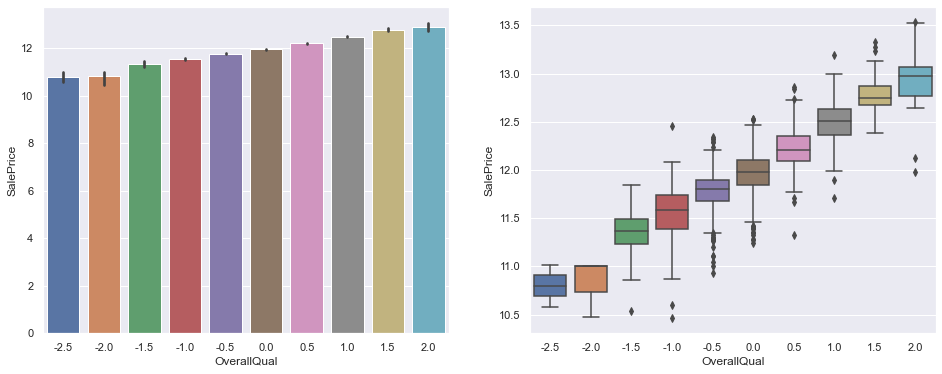

In [136]:
fig, ax = plt.subplots(1,2,figsize=(16, 6))
sns.barplot('OverallQual', 'SalePrice', data=train_test, ax=ax[0])
sns.boxplot('OverallQual', 'SalePrice', data=train_test, ax=ax[1])
plt.show()

## pca

In [137]:
pca_df.sort_values('feature1')

,corr,feature1,feature2
47,0.821,BsmtCond,TotalBsmtSF
48,0.854,BsmtFinType1,BsmtFinSF1
51,0.878,BsmtFinType2,BsmtFinSF2
43,0.713,BsmtQual,TotalBsmtSF
40,0.679,ExterQual,SalePrice
36,0.714,ExterQual,KitchenQual
33,0.856,Exterior1st,Exterior2nd
68,0.862,Fireplaces,FireplaceQu
80,0.927,GarageArea,GarageCond
79,0.927,GarageArea,GarageQual


In [138]:
df02[df02['YearBuilt'] < df02['YearRemodAdd']][['YearBuilt', 'YearRemodAdd']]

,YearBuilt,YearRemodAdd
3,-1.282299,-0.648649
15,-0.969260,0.189189
24,-0.109049,0.189189
26,-0.481899,0.162162
28,-0.349935,0.081081
...,...,...
1423,-0.902475,-0.108108
1424,-0.946987,-0.945946
1433,-1.259864,-1.189189
1447,-0.109049,0.243243


### bsmt

In [139]:
bsmt_cols = df02.columns[29:38].tolist()
print(bsmt_cols)

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']


In [140]:
df02[bsmt_cols].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,0.0,0.0,0.0,0.4,0.092710,0.0,0.0,-0.898157,-0.300181
1,0.0,0.0,3.0,0.2,0.142255,0.0,0.0,-0.403505,0.492878
2,0.0,0.0,1.0,0.4,0.035971,0.0,0.0,-0.074216,-0.152897
3,-1.0,1.0,0.0,0.2,-0.087072,0.0,0.0,0.095602,-0.553912
4,0.0,0.0,2.0,0.4,0.081314,0.0,0.0,0.020085,0.294081


In [141]:
bsmt_pca = PCA(n_components=1)
df02['Bsmt'] = bsmt_pca.fit_transform(df02[bsmt_cols])

In [142]:
df02[bsmt_cols + ['Bsmt']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Bsmt
0,0.0,0.0,0.0,0.4,0.092710,0.0,0.0,-0.898157,-0.300181,0.074181
1,0.0,0.0,3.0,0.2,0.142255,0.0,0.0,-0.403505,0.492878,-1.204238
2,0.0,0.0,1.0,0.4,0.035971,0.0,0.0,-0.074216,-0.152897,-0.463691
3,-1.0,1.0,0.0,0.2,-0.087072,0.0,0.0,0.095602,-0.553912,0.068325
4,0.0,0.0,2.0,0.4,0.081314,0.0,0.0,0.020085,0.294081,-1.031696
...,...,...,...,...,...,...,...,...,...,...
1454,-1.0,0.0,0.0,-0.6,-0.905951,0.0,0.0,0.104191,-1.218356,0.899172
1455,-1.0,0.0,0.0,-0.2,-0.063708,0.0,0.0,-0.376650,-1.218356,0.997256
1456,-1.0,0.0,0.0,0.2,0.176375,0.0,0.0,-4.805231,0.430406,0.959137
1457,0.0,0.0,2.0,0.4,-0.019620,0.0,0.0,0.144419,-0.170738,-0.660380


In [143]:
df02 = df02.drop(bsmt_cols, axis=1)

In [144]:
df02.shape

(2919, 72)

### fireplace

In [145]:
fireplace_cols = ['Fireplaces', 'FireplaceQu']
df02[fireplace_cols].head()

,Fireplaces,FireplaceQu
0,-1.0,-0.50
1,0.0,0.25
2,0.0,0.25
3,0.0,0.50
4,0.0,0.25


In [146]:
fireplace_pca = PCA(n_components=1)
df02['fireplace'] = fireplace_pca.fit_transform(df02[fireplace_cols])

In [147]:
df02[fireplace_cols + ['fireplace']].head()

,Fireplaces,FireplaceQu,fireplace
0,-1.0,-0.50,-0.741898
1,0.0,0.25,0.505941
2,0.0,0.25,0.505941
3,0.0,0.50,0.643925
4,0.0,0.25,0.505941


In [148]:
df02 = df02.drop(fireplace_cols, axis=1)
df02.shape

(2919, 71)

### garage

In [149]:
garage_cols = df02.columns[46:53].tolist()

In [150]:
df02[garage_cols].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,0.0,0.448663,0.0,0.0,0.243856,0.0,0.0
1,0.0,-0.207544,0.0,0.0,-0.078320,0.0,0.0
2,0.0,0.400360,0.0,0.0,0.435133,0.0,0.0
3,-1.0,0.327813,-1.0,1.0,0.535320,0.0,0.0
4,0.0,0.376190,0.0,1.0,1.021588,0.0,0.0


In [151]:
garage_pca = PCA(n_components=1)
df02['garage'] = garage_pca.fit_transform(df02[garage_cols])

In [152]:
df02[garage_cols + ['garage']].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,garage
0,0.0,0.448663,0.0,0.0,0.243856,0.0,0.0,-1.039277
1,0.0,-0.207544,0.0,0.0,-0.078320,0.0,0.0,-0.752741
2,0.0,0.400360,0.0,0.0,0.435133,0.0,0.0,-1.212867
3,-1.0,0.327813,-1.0,1.0,0.535320,0.0,0.0,-1.231917
4,0.0,0.376190,0.0,1.0,1.021588,0.0,0.0,-1.936473


In [153]:
df02 = df02.drop(garage_cols, axis=1)
df02.shape

(2919, 65)

### pool

In [154]:
pool_cols = ['PoolArea', 'PoolQC']
df02[pool_cols].head()

,PoolArea,PoolQC
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [155]:
pool_pca = PCA(n_components=1)
df02['pool'] = pool_pca.fit_transform(df02[pool_cols])

In [156]:
df02[pool_cols + ['pool']].head()

,PoolArea,PoolQC,pool
0,0.0,0.0,-2.25184
1,0.0,0.0,-2.25184
2,0.0,0.0,-2.25184
3,0.0,0.0,-2.25184
4,0.0,0.0,-2.25184


In [157]:
df02 = df02.drop(pool_cols, axis=1)
df02.shape

(2919, 64)

### kitchen

In [158]:
kitchen_cols = ['KitchenAbvGr', 'KitchenQual']
df02[kitchen_cols].head()

,KitchenAbvGr,KitchenQual
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [159]:
kitchen_pca = PCA(n_components=1)
df02['kitchen'] = kitchen_pca.fit_transform(df02[kitchen_cols])

In [160]:
df02[kitchen_cols + ['kitchen']].head()

,KitchenAbvGr,KitchenQual,kitchen
0,0.0,1.0,-0.492031
1,0.0,0.0,0.506144
2,0.0,1.0,-0.492031
3,0.0,1.0,-0.492031
4,0.0,1.0,-0.492031


In [161]:
df02 = df02.drop(kitchen_cols, axis=1)
df02.shape

(2919, 63)

### FlrSF

In [162]:
flrsf_cols = ['1stFlrSF', '2ndFlrSF']

flrsf_pca = PCA(n_components=1)
df02['flrsf'] = flrsf_pca.fit_transform(df02[flrsf_cols])

In [163]:
df02 = df02.drop(flrsf_cols, axis=1)
df02.shape

(2919, 62)

### bath

In [164]:
bath_cols = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

bath_pca = PCA(n_components=1)
df02['bath'] = bath_pca.fit_transform(df02[bath_cols])

df02 = df02.drop(bath_cols, axis=1)
df02.shape

(2919, 59)

In [165]:
df03 = df02
df03.shape

(2919, 59)

In [166]:
df03

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType,SaleCondition,SalePrice,Bsmt,fireplace,garage,pool,kitchen,flrsf,bath
0,0.2,0.0,0.113485,-0.267660,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12.247699,0.074181,-0.741898,-1.039277,-2.25184,-0.492031,-0.744253,0.589834
1,-0.6,0.0,0.868758,0.029682,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,12.109016,-1.204238,0.505941,-0.752741,-2.25184,0.506144,0.448910,0.226620
2,0.2,0.0,0.277421,0.399288,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,12.317171,-0.463691,0.505941,-1.212867,-2.25184,-0.492031,-0.600457,0.589834
3,0.4,0.0,-0.177056,0.017513,0.0,0.0,-1.0,0.0,0.0,-2.0,...,0.0,-4.0,11.849405,0.068325,0.643925,-1.231917,-2.25184,-0.492031,-0.504656,-0.759603
4,0.2,0.0,1.046525,0.951802,0.0,0.0,-1.0,0.0,0.0,-1.0,...,0.0,0.0,12.429220,-1.031696,0.505941,-1.936473,-2.25184,-0.492031,-0.173455,0.589834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.2,1.0,-3.938151,-3.700941,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.899172,-0.741898,11.710662,-2.25184,0.506144,-1.618605,-0.113290
1455,2.2,1.0,-3.938151,-3.752031,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-4.0,NaN,0.997256,-0.741898,0.472974,-2.25184,0.506144,-1.618605,-0.113290
1456,-0.6,0.0,3.402220,1.740129,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-4.0,NaN,0.959137,0.505941,-0.866065,-2.25184,0.506144,0.387555,-0.759603
1457,0.7,0.0,-0.058079,0.225378,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,-0.660380,-0.741898,11.710662,-2.25184,0.506144,-0.079142,-0.629291


## metrics

----------------------------------------
model = LinearRegression
RMSE  = 0.032681991027858084


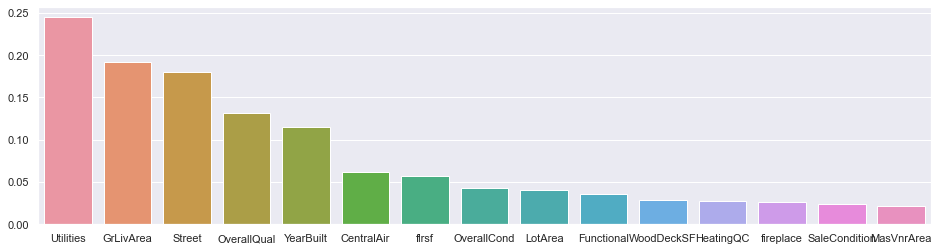

----------------------------------------
model = Ridge
RMSE  = 0.032009777987737714


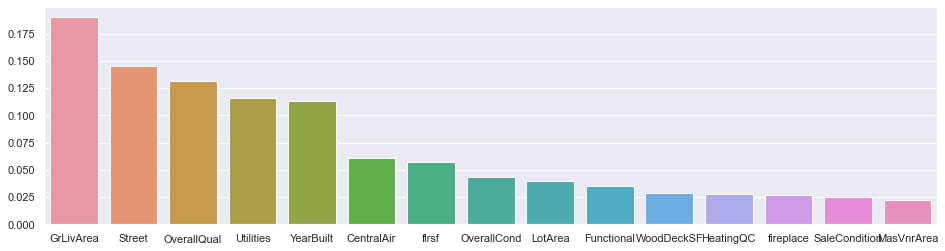

----------------------------------------
model = Lasso
RMSE  = 0.15143062495659293


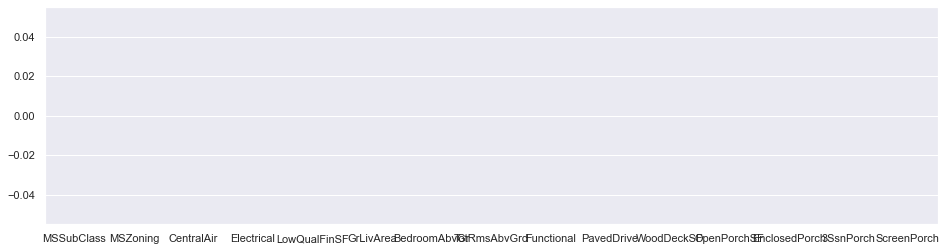

----------------------------------------
model = ElasticNet
RMSE  = 0.14235163053546374


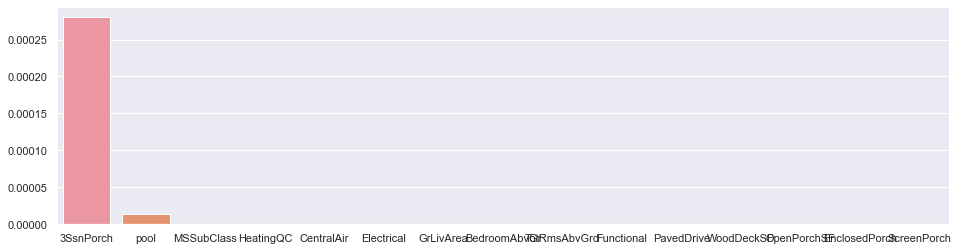

----------------------------------------
model = XGBRegressor
RMSE  = 0.034515297000576255


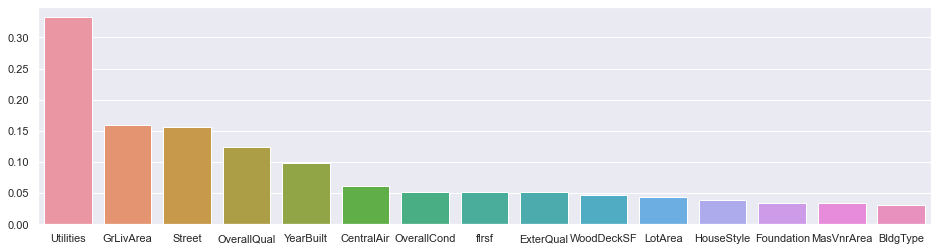

In [167]:
# regression cross_validate : INPUT DF VERSION & TARGET
# ==================================================
df_met     = df03
target_met = 'SalePrice'
# ==================================================

# X, y split
train_test_met   = df_met[df_met[target_met].notna()]
X_sub            = df_met[df_met[target_met].isna()]
X_train_test_met = train_test_met.drop(target_met, axis=1)
y_train_test_met = train_test_met[target_met]
X_train, X_test, y_train, y_test = train_test_split(X_train_test_met, y_train_test_met, test_size=0.2, random_state=0, shuffle=True)

# estimators=
regressor_models = [
                    LinearRegression      (),
                    # DecisionTreeRegressor (random_state=0),
                    Ridge                 (random_state=0),
                    Lasso                 (random_state=0),
                    ElasticNet            (random_state=0),
                    # RandomForestRegressor (random_state=0),
                    XGBRegressor          (random_state=0, booster='gblinear'),
                    # LGBMRegressor         (random_state=0),
                    # CatBoostRegressor     (random_state=0, verbose=0),
                    ]

for model in regressor_models:
    
    print('-' * 40)
    print('model =', model.__class__.__name__)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    rmse   = mean_squared_error(y_test, y_pred)
    print('RMSE  =', rmse)
    model_coef = pd.DataFrame(model.coef_, index=X_train_test_met.columns).sort_values(by=0, ascending=False).head(15).T
    f, ax = plt.subplots(figsize=(16, 4))
    sns.barplot(data=model_coef)
    plt.show()

----------------------------------------
model = DecisionTreeRegressor
RMSE  = 0.047439774546258154


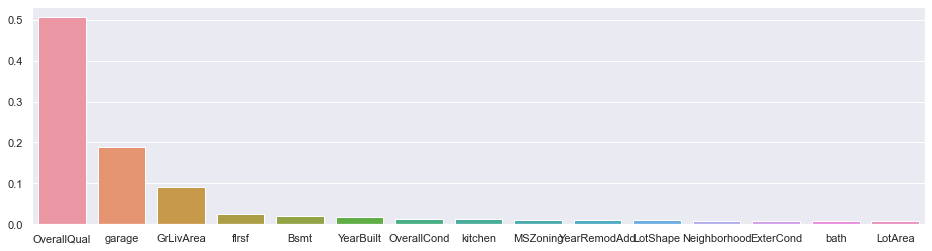

----------------------------------------
model = RandomForestRegressor
RMSE  = 0.0194407546916362


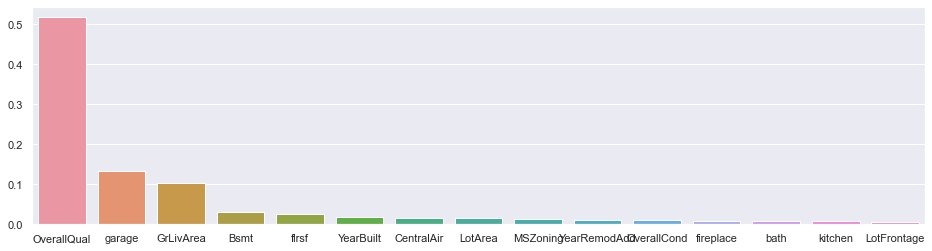

----------------------------------------
model = LGBMRegressor
RMSE  = 0.018906634074971493


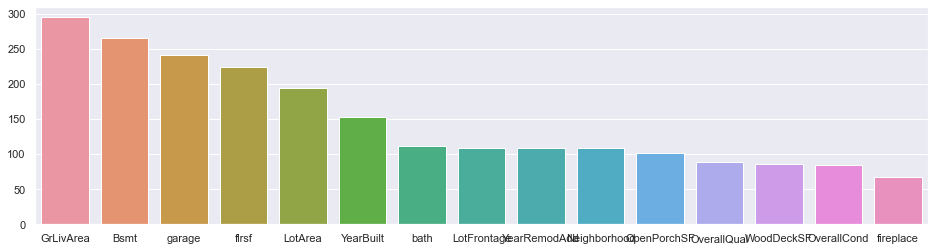

----------------------------------------
model = CatBoostRegressor
RMSE  = 0.017911934385114712


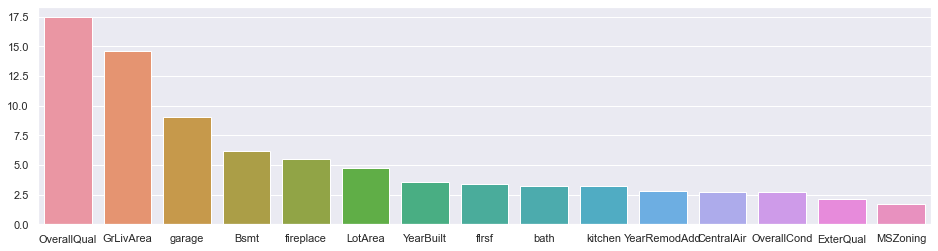

In [168]:
# regression cross_validate : INPUT DF VERSION & TARGET
# ==================================================
df_met     = df03
target_met = 'SalePrice'
# ==================================================

# X, y split
train_test_met   = df_met[df_met[target_met].notna()]
X_sub            = df_met[df_met[target_met].isna()]
X_train_test_met = train_test_met.drop(target_met, axis=1)
y_train_test_met = train_test_met[target_met]
X_train, X_test, y_train, y_test = train_test_split(X_train_test_met, y_train_test_met, test_size=0.2, random_state=0, shuffle=True)

# estimators=
regressor_models = [
                    # LinearRegression      (),
                    DecisionTreeRegressor (random_state=0),
                    # Ridge                 (random_state=0),
                    # Lasso                 (random_state=0),
                    # ElasticNet            (random_state=0),
                    RandomForestRegressor (random_state=0),
                    # XGBRegressor          (random_state=0, booster='gblinear'),
                    LGBMRegressor         (random_state=0),
                    CatBoostRegressor     (random_state=0, verbose=0),
                    ]

for model in regressor_models:
    
    print('-' * 40)
    print('model =', model.__class__.__name__)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    rmse   = mean_squared_error(y_test, y_pred)
    print('RMSE  =', rmse)
    model_coef = pd.DataFrame(model.feature_importances_, index=X_train_test_met.columns).sort_values(by=0, ascending=False).head(15).T
    f, ax = plt.subplots(figsize=(16, 4))
    sns.barplot(data=model_coef)
    plt.show()

## submission

In [169]:
sub_pred = model.predict(X_sub)
sub_pred

array([11.79060605, 12.04776893, 12.11380965, ..., 11.94297959,
       11.67431731, 12.23713452])

In [170]:
sub_pred = np.expm1(sub_pred)
sub_pred

array([132005.4475166 , 170717.09835202, 182372.06096116, ...,
       153733.07261151, 117513.53515577, 206308.86556846])

In [171]:
y_sub.head()


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: SalePrice, dtype: float64

In [172]:
y_sub = pd.read_csv('./sample_submission.csv')

In [173]:
y_sub['SalePrice'] = sub_pred
y_sub

,Id,SalePrice
0,1461,132005.447517
1,1462,170717.098352
2,1463,182372.060961
3,1464,191829.440571
4,1465,195659.669205
...,...,...
1454,2915,79146.115775
1455,2916,76836.574123
1456,2917,153733.072612
1457,2918,117513.535156


In [174]:
y_sub.to_csv('./sub_v02_pjh.csv', index=False)